# Collab Setup

In [1]:
# Menghubungkan antara google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #directories, join path
import glob
import cv2
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import re

##### Fungsi Heatmap

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# Pengumpulan Data

### Cardboard - Kardus
Kelas hanya berisi kardus. Berbeda dengan kertas, kardus lebih keras dan memiliki banyak lapisan kertas
403 Citra

In [ ]:
cb1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg",1)
cb1 = cv2.cvtColor(cb1, cv2.COLOR_BGR2RGB)
cb2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard166.jpg",1)
cb2 = cv2.cvtColor(cb2, cv2.COLOR_BGR2RGB)
cb3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard190.jpg",1)
cb3 = cv2.cvtColor(cb3, cv2.COLOR_BGR2RGB)

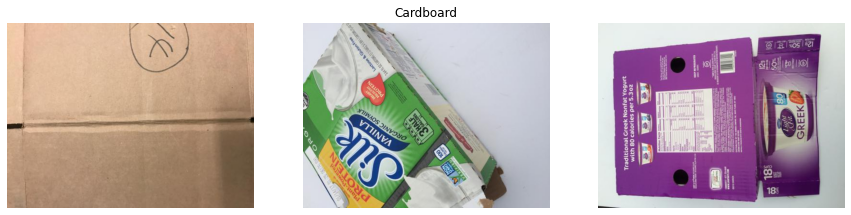

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(cb1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(cb2),plt.axis("off")
plt.title('Cardboard'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cb3),plt.axis("off")
plt.show()

### Glass - Kaca
Kelas berisi produk kaca seperti botol kaca, cangkir kaca, dan toples kaca
501 Citra

In [ ]:
gl1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass1.jpg",1)
gl1 = cv2.cvtColor(gl1, cv2.COLOR_BGR2RGB)
gl2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass3.jpg",1)
gl2 = cv2.cvtColor(gl2, cv2.COLOR_BGR2RGB)
gl3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/glass/glass65.jpg",1)
gl3 = cv2.cvtColor(gl3, cv2.COLOR_BGR2RGB)

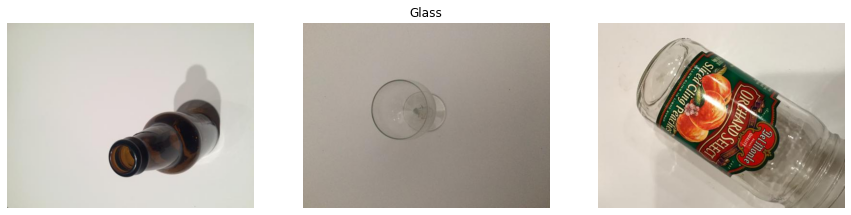

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(gl1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(gl2),plt.axis("off")
plt.title('Glass'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(gl3),plt.axis("off")
plt.show()

### Metal - Logam
Kelas berisi produk logam seperti kaleng dan aluminium foil
410 Citra

In [ ]:
mt1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal1.jpg",1)
mt1 = cv2.cvtColor(mt1, cv2.COLOR_BGR2RGB)
mt2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal44.jpg",1)
mt2 = cv2.cvtColor(mt2, cv2.COLOR_BGR2RGB)
mt3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/metal/metal65.jpg",1)
mt3 = cv2.cvtColor(mt3, cv2.COLOR_BGR2RGB)

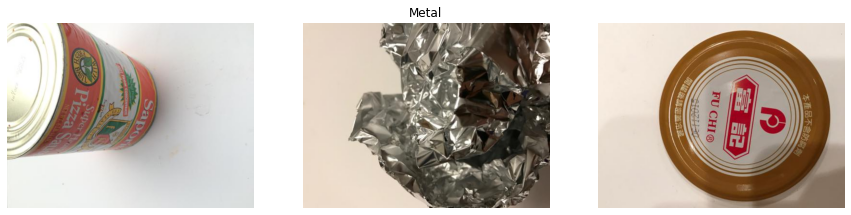

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(mt1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(mt2),plt.axis("off")
plt.title('Metal'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(mt3),plt.axis("off")
plt.show()

### Paper - Kertas
Kelas hanya berisi kertas. Berbeda dengan kardus, kertas hanya memiliki satu lapisan
594 Citra

In [ ]:
pp1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper1.jpg",1)
pp1 = cv2.cvtColor(pp1, cv2.COLOR_BGR2RGB)
pp2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper74.jpg",1)
pp2 = cv2.cvtColor(pp2, cv2.COLOR_BGR2RGB)
pp3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/paper/paper119.jpg",1)
pp3 = cv2.cvtColor(pp3, cv2.COLOR_BGR2RGB)

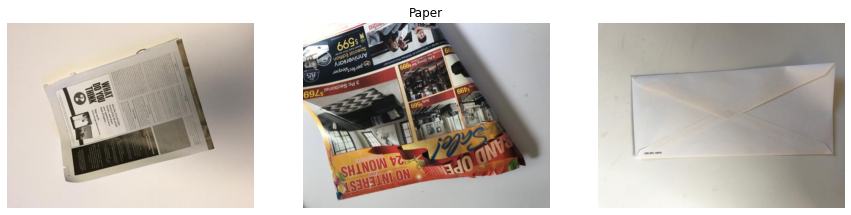

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(pp1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(pp2),plt.axis("off")
plt.title('Paper'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(pp3),plt.axis("off")
plt.show()

### Plastic - Plastik
Kelas berisi produk plastik seperti botol dan wadah plastik
482 Citra

In [ ]:
pl1 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic1.jpg",1)
pl1 = cv2.cvtColor(pl1, cv2.COLOR_BGR2RGB)
pl2 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic47.jpg",1)
pl2 = cv2.cvtColor(pl2, cv2.COLOR_BGR2RGB)
pl3 = cv2.imread("/content/drive/MyDrive/Skripsi/dataset-resized/plastic/plastic125.jpg",1)
pl3 = cv2.cvtColor(pl3, cv2.COLOR_BGR2RGB)

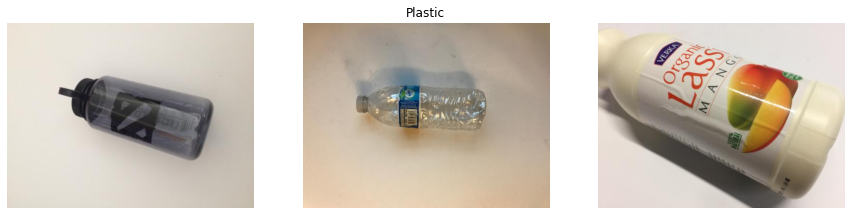

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(pl1),plt.axis("off")
plt.subplot(1,3,2),plt.imshow(pl2),plt.axis("off")
plt.title('Plastic'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(pl3),plt.axis("off")
plt.show()

In [ ]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = '/content/drive/MyDrive/Skripsi/dataset-resized/' # data root path
classes_dir = ['cardboard', 'glass', 'metal', 'paper', 'plastic'] #total labels

val_ratio = 0.15
test_ratio = 0.05

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'val/' + cls)
    os.makedirs(root_dir +'test/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir + cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))),
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

for cls in classes_dir:
       # Copy-pasting images
       for name in train_FileNames:
              shutil.copy(name, root_dir +'train/' + cls)

       for name in val_FileNames:
              shutil.copy(name, root_dir +'val/' + cls)

       for name in test_FileNames:
               shutil.copy(name, root_dir +'test/' + cls)

Total images:  482
Training:  385
Validation:  72
Testing:  25


In [ ]:
os.makedirs('./output')
os.makedirs('./output/train')
os.makedirs('./output/val')
os.makedirs('./output/test')

os.listdir('./output')

In [ ]:
import shutil
import random
import math

root_dir = '../input/flowers/flowers'
classes = ['astilbe', 'bellflower', 'black-eyed susan', 'calendula', 'california poppy', 'carnation', 'common daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water lily']

for clss in classes:
print('------------' + clss + '-------------')
dirtry = root_dir + '/' + clss
files = os.listdir(dirtry)
np.random.shuffle(files)

# Pra-pemrosesan Data

#### Konversi RGB ke Grayscale

In [ ]:
# Get directory of image
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"

 # Reading Image
img = cv2.imread(img_dir)

In [ ]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
# img

In [ ]:
# Dua cara berbeda dalam konversi RGB ke Grayscale menggunakan OpenCV

# Cara 1
gray_01 = cv.imread(img_dir, 0)

# Cara 2
gray_02 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting Image to grayscale

In [ ]:
print(f'matriks gray_01 : \n{gray_01}')
print(f'matriks gray_02 : \n{gray_02}')

matriks gray_01 : 
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]
matriks gray_02 : 
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]


#### Denoising Filter
* https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
* https://learnopencv.com/image-filtering-using-convolution-in-opencv/

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import gaussian

approx_gaussian_kernel = np.array([[1/273, 4/273, 7/273, 4/273, 1/273],
                            [4/273, 16/273, 26/273, 16/273, 4/273],
                            [7/273, 26/273, 41/273, 26/273, 7/273],
                            [4/273, 16/273, 26/273, 16/273, 4/273],
                            [1/273, 4/273, 7/273, 4/273, 1/273]])

# OpenCV Library
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
opencv_gray_img = cv.imread(img_dir, 0)

# Median Blur

# Gaussian Blur
gaussian_using_cv2 = cv.GaussianBlur(opencv_gray_img,(5,5),0,borderType=cv2.BORDER_CONSTANT)
# Bilateral Blur


# Skimage Library
skimage_gray_img = img_as_float(io.imread(img_dir, as_gray='True'))
# Median Blur

# Gaussian Blur
gaussian_using_skimage = gaussian(skimage_gray_img, sigma=1, mode='constant', cval=0.0)
# Bilateral Blur

In [ ]:
print(f'{skimage_gray_img}')
print(f'{gaussian_using_skimage}')
print(f'{opencv_gray_img}')
print(f'{gaussian_using_cv2}')

[[0.80775098 0.80775098 0.81167255 ... 0.69513373 0.70297686 0.70689843]
 [0.81167255 0.81559412 0.81951569 ... 0.69905529 0.70297686 0.70297686]
 [0.81951569 0.82343725 0.82343725 ... 0.70297686 0.69905529 0.69905529]
 ...
 [0.60077098 0.60469255 0.61253569 ... 0.36755412 0.36755412 0.36755412]
 [0.60077098 0.60077098 0.60077098 ... 0.36363255 0.36755412 0.36755412]
 [0.60861412 0.60077098 0.59292784 ... 0.36363255 0.36755412 0.36755412]]
[[0.39687694 0.53517794 0.56762395 ... 0.48637005 0.46186857 0.34417078]
 [0.53672746 0.72385992 0.76750295 ... 0.65658971 0.6216952  0.46234035]
 [0.57136809 0.77038806 0.81644804 ... 0.69763372 0.65785096 0.48779519]
 ...
 [0.4217585  0.56826082 0.60115352 ... 0.3629168  0.34470676 0.25660308]
 [0.39714618 0.53412308 0.56396828 ... 0.34240176 0.32509177 0.24203398]
 [0.29511448 0.39562041 0.41611675 ... 0.25409676 0.24128178 0.17969304]]
[[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 

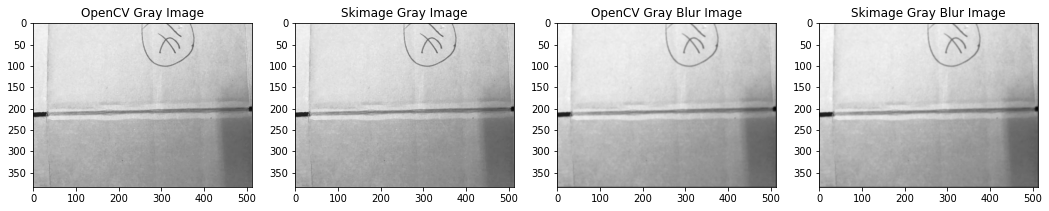

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(141),plt.imshow(opencv_gray_img, 'gray'),plt.title('OpenCV Gray Image')
plt.subplot(142),plt.imshow(skimage_gray_img, 'gray'),plt.title('Skimage Gray Image')
plt.subplot(143),plt.imshow(gaussian_using_cv2, 'gray'),plt.title('OpenCV Gray Blur Image')
plt.subplot(144),plt.imshow(gaussian_using_skimage, 'gray'),plt.title('Skimage Gray Blur Image')
plt.show()

#### Gaussian Filter

Referensi :
- https://www.geeksforgeeks.org/opencv-python-program-to-blur-an-image/?ref=gcse
- https://www.geeksforgeeks.org/python-opencv-getgaussiankernel-function/
- https://dsp.stackexchange.com/questions/10057/gaussian-blur-standard-deviation-radius-and-kernel-size

cv2.GaussianBlur(img,(5,5),0)

- https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

In [ ]:
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
gray_img = cv.imread(img_dir, 0)

gaussian_blur_img = cv.GaussianBlur(gray_img,(5,5),0)

print("Nilai piksel citra gray adalah \n", gray_img)
print("\nNilai piksel citra gray yang sudah diblur adalah \n", gaussian_blur_img)

Nilai piksel citra gray adalah 
 [[208 208 209 ... 180 182 183]
 [209 210 211 ... 181 182 182]
 [211 212 212 ... 182 181 181]
 ...
 [155 156 158 ...  95  95  95]
 [155 155 155 ...  94  95  95]
 [157 155 153 ...  94  95  95]]

Nilai piksel citra gray yang sudah diblur adalah 
 [[209 210 210 ... 181 182 182]
 [210 210 211 ... 181 182 182]
 [211 212 212 ... 182 182 182]
 ...
 [156 156 157 ...  95  95  95]
 [156 155 155 ...  94  95  95]
 [155 155 155 ...  94  95  95]]


In [ ]:
# plt.imshow(gray_img,'gray')

In [ ]:
# plt.imshow(gaussian_blur_img,'gray')

cv2.getGaussianKernel()
- https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa

In [ ]:
# Syntax: cv.getGaussianKernel(ksize, sigma[, ktype])

# Parameters:

# Ksize: It is the Aperture size. Ksize value should be odd and positive.
# sigma: Sigma is the Gaussian standard deviation.
# It is computed from ksize as sigma = 0.3*((ksize-1)*0.5 – 1) + 0.8 if it is non-positive.
# ktype: It is the type of filter coefficients. It can be CV_32F or CV_64F.

In [ ]:
# read image
img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg"
gray_img = cv.imread(img_dir, 0)

# Creates Gaussian kernel
a = cv2.getGaussianKernel(5, 1.1)

# print Gaussian filter coefficients matrix
print(a)

[[0.07076637]
 [0.2444604 ]
 [0.36954646]
 [0.2444604 ]
 [0.07076637]]


In [ ]:
ksize = input('Masukkan ksize untuk kernel : ')
ksize = int(ksize)
sigma = 0.3*(((ksize-1)*0.5)-1) + 0.8
sigma

Masukkan ksize untuk kernel : 5


1.1

In [ ]:
Gi = α∗e−(i−(ksize−1)/2)2/(2∗sigma2)

Gaussian kernel function

In [ ]:
def gkernel(l=5, sig=1):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting Image to grayscale
g_kernel = gkernel(5,1) # Create gaussian kernel with 5x5(odd) size and sigma equals to 1
print("Gaussian Filter: ",g_kernel) # show the kernel array
dst = cv2.filter2D(gray,-1,g_kernel) #convolve kernel with image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
# dst = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert BGR(opencv format) to RGB format

Gaussian Filter:  [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


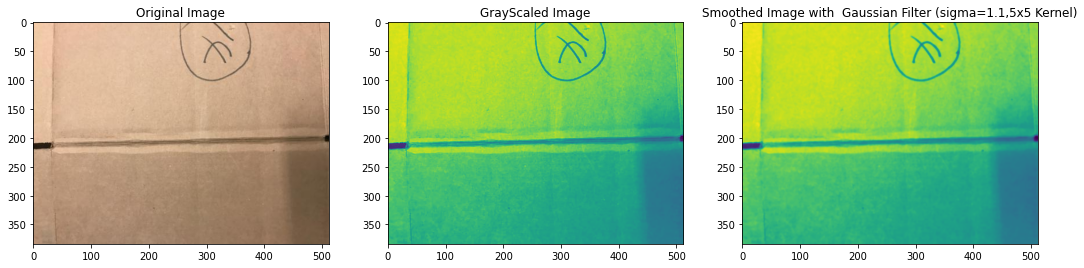

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(131),plt.imshow(img),plt.title('Original Image') # visualize and give title
plt.subplot(132),plt.imshow(gray),plt.title('GrayScaled Image')
plt.subplot(133),plt.imshow(dst),plt.title('Smoothed Image with  Gaussian Filter (sigma=1.1,5x5 Kernel)')
plt.show()

#### Resize Citra Asli (512 x 384) ke ukuran (8x8)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image

# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (8, 8)) #Rumus resize yang digunakan menggunakan interpolasi linear

print(f"Resized Dimensions : {resized.shape}")
# cv2.imwrite('resized_imaged.jpg', resized)

Original Dimensions : (384, 512, 3)
Resized Dimensions : (8, 8, 3)


In [ ]:
# print(f'rezized : \n{resized}')

In [ ]:
# print(f'rezized[0] : \n{resized[0]}')
# print(f'rezized[1] : \n{resized[1]}')
# print(f'rezized[2] : \n{resized[2]}')
# print(f'rezized[0][0] : \n{resized[0][0]}')

In [ ]:
len(resized)
# resized.ndim

8

In [ ]:
gray_resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray_resized

array([[211, 199, 202, 197, 203, 190, 181, 178],
       [202, 201, 201, 193, 194, 185, 175, 169],
       [205, 196, 195, 191, 183, 180, 167, 158],
       [188, 194, 192, 185, 181, 170, 160, 135],
       [100, 162, 180, 195, 177, 165, 160, 123],
       [152, 162, 155, 150, 142, 135, 132,  92],
       [156, 155, 146, 140, 136, 128, 129,  90],
       [152, 149, 145, 138, 131, 127, 123,  96]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0)
gaussian_blur_img

array([[202, 201, 199, 196, 192, 186, 179, 176],
       [201, 200, 197, 194, 190, 183, 176, 172],
       [194, 194, 193, 190, 185, 177, 168, 164],
       [179, 182, 185, 184, 178, 169, 158, 153],
       [162, 166, 173, 173, 167, 157, 146, 140],
       [154, 156, 159, 157, 151, 142, 132, 126],
       [153, 152, 150, 145, 139, 132, 122, 117],
       [153, 151, 147, 141, 135, 128, 119, 114]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_REFLECT_101)
gaussian_blur_img

array([[202, 201, 199, 196, 192, 186, 179, 176],
       [201, 200, 197, 194, 190, 183, 176, 172],
       [194, 194, 193, 190, 185, 177, 168, 164],
       [179, 182, 185, 184, 178, 169, 158, 153],
       [162, 166, 173, 173, 167, 157, 146, 140],
       [154, 156, 159, 157, 151, 142, 132, 126],
       [153, 152, 150, 145, 139, 132, 122, 117],
       [153, 151, 147, 141, 135, 128, 119, 114]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1)
gaussian_blur_img

array([[202, 201, 199, 196, 193, 186, 179, 176],
       [201, 200, 198, 194, 190, 183, 176, 172],
       [195, 195, 194, 190, 185, 177, 168, 163],
       [179, 182, 186, 185, 178, 169, 158, 152],
       [160, 166, 173, 174, 167, 158, 146, 139],
       [154, 156, 159, 157, 151, 142, 131, 124],
       [153, 153, 149, 144, 139, 131, 122, 115],
       [153, 151, 146, 140, 135, 128, 119, 113]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_CONSTANT)
gaussian_blur_img

array([[ 96, 130, 137, 135, 133, 129, 116,  83],
       [130, 176, 185, 182, 178, 172, 154, 110],
       [134, 182, 193, 190, 185, 177, 158, 111],
       [121, 170, 185, 184, 178, 169, 148, 102],
       [108, 156, 173, 173, 167, 157, 136,  92],
       [104, 146, 159, 157, 151, 142, 123,  82],
       [ 98, 134, 140, 136, 130, 124, 107,  71],
       [ 72,  97, 100,  96,  92,  88,  76,  51]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1,borderType=cv2.BORDER_CONSTANT)
gaussian_blur_img

array([[101, 134, 140, 139, 136, 132, 120,  87],
       [134, 179, 187, 184, 180, 173, 157, 113],
       [137, 184, 194, 190, 185, 177, 159, 113],
       [124, 172, 186, 185, 178, 169, 150, 104],
       [109, 156, 173, 174, 167, 158, 138,  94],
       [106, 148, 159, 157, 151, 142, 124,  83],
       [101, 136, 141, 137, 131, 124, 109,  73],
       [ 75, 100, 102,  98,  94,  90,  79,  53]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),0,borderType=cv2.BORDER_REPLICATE)
gaussian_blur_img

array([[206, 202, 200, 198, 194, 188, 181, 176],
       [203, 200, 198, 195, 190, 183, 176, 170],
       [194, 194, 193, 190, 185, 177, 167, 159],
       [174, 181, 185, 184, 178, 169, 157, 145],
       [154, 165, 173, 173, 167, 157, 144, 129],
       [148, 155, 159, 157, 151, 142, 129, 114],
       [152, 152, 149, 145, 139, 131, 120, 106],
       [152, 150, 145, 139, 134, 127, 117, 104]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1,borderType=cv2.BORDER_REPLICATE)
gaussian_blur_img

array([[206, 202, 200, 198, 195, 188, 181, 176],
       [203, 200, 198, 195, 190, 184, 176, 170],
       [195, 195, 194, 190, 185, 177, 167, 159],
       [174, 182, 186, 185, 178, 169, 157, 145],
       [151, 164, 173, 174, 167, 158, 144, 129],
       [148, 155, 159, 157, 151, 142, 129, 113],
       [152, 152, 149, 144, 138, 131, 120, 105],
       [152, 150, 145, 139, 133, 127, 117, 104]], dtype=uint8)

In [ ]:
get_kernel = cv.getGaussianKernel(5,1)
get_kernel

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

In [ ]:
img_testing = np.array([[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,1,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0]],dtype='uint8')
img_testing

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
gaussian_blur_img = cv.GaussianBlur(img_testing,(5,5),1)
gaussian_blur_img

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
img=np.zeros((7,7))
img[3,3]=1
img

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

Cara mengetahui kernel yang digunakan pada funsgi GaussianBlur()

https://stackoverflow.com/questions/61394826/how-do-i-get-to-show-gaussian-kernel-for-2d-opencv

https://learnopencv.com/image-filtering-using-convolution-in-opencv/

In [ ]:
img1 = cv2.GaussianBlur(img, (5, 5), 0)
img1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.0234375 , 0.09375   , 0.140625  , 0.09375   ,
        0.0234375 , 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img3 = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0)
img3

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.0234375 , 0.09375   , 0.140625  , 0.09375   ,
        0.0234375 , 0.        ],
       [0.        , 0.015625  , 0.0625    , 0.09375   , 0.0625    ,
        0.015625  , 0.        ],
       [0.        , 0.00390625, 0.015625  , 0.0234375 , 0.015625  ,
        0.00390625, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img2 = cv2.GaussianBlur(img, (5, 5), 1)
img2

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.02193823, 0.09832033, 0.16210282, 0.09832033,
        0.02193823, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img4 = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=1, sigmaY=0)
img4

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.02193823, 0.09832033, 0.16210282, 0.09832033,
        0.02193823, 0.        ],
       [0.        , 0.01330621, 0.0596343 , 0.09832033, 0.0596343 ,
        0.01330621, 0.        ],
       [0.        , 0.00296902, 0.01330621, 0.02193823, 0.01330621,
        0.00296902, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
img_testing = np.array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
               [0.01330621, 0.0596343 , 0.09832033, 0.0596343, 0.01330621],
               [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
               [0.01330621, 0.0596343 , 0.09832033, 0.0596343, 0.01330621],
               [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]],dtype='float')

In [ ]:
np.sum(img_testing)

1.00000002

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1, 41))
scaled = scaler.fit_transform(img_testing)
scaled

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [22.79782922, 22.79783311, 22.79783068, 22.79783311, 22.79782922],
       [41.        , 41.        , 41.        , 41.        , 41.        ],
       [22.79782922, 22.79783311, 22.79783068, 22.79783311, 22.79782922],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
np.sum(img1)

1.0

In [ ]:
gray_resized

array([[211, 199, 202, 197, 203, 190, 181, 178],
       [202, 201, 201, 193, 194, 185, 175, 169],
       [205, 196, 195, 191, 183, 180, 167, 158],
       [188, 194, 192, 185, 181, 170, 160, 135],
       [100, 162, 180, 195, 177, 165, 160, 123],
       [152, 162, 155, 150, 142, 135, 132,  92],
       [156, 155, 146, 140, 136, 128, 129,  90],
       [152, 149, 145, 138, 131, 127, 123,  96]], dtype=uint8)

In [ ]:
# Apply identity kernel
kernel1 = np.array([[1,4,7,4,1],
                    [4,16,26,16,4],
                    [7,26,41,26,7],
                    [4,16,26,16,4],
                    [1,4,7,4,1]])

identity = cv2.filter2D(src=gray_resized, ddepth=-1, kernel=kernel1)
identity

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
g_kernel = gkernel(5,1) # Create gaussian kernel with 5x5(odd) size and sigma equals to 1
print(f"Gaussian Filter (5x5): \n{g_kernel}") # show the kernel array
dst = cv2.filter2D(gray_resized,-1,g_kernel) #convolve kernel with image
print(f"Matriks Piksel 8x8 yang sudah dilakukan Gaussian Blur (5x5)\n{dst}")

Gaussian Filter (5x5): 
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
Matriks Piksel 8x8 yang sudah dilakukan Gaussian Blur (5x5)
[[202 201 199 196 193 186 179 176]
 [201 200 198 194 190 183 176 172]
 [195 195 194 190 185 177 168 163]
 [179 182 186 185 178 169 158 152]
 [160 166 173 174 167 158 146 139]
 [154 156 159 157 151 142 131 124]
 [153 152 149 144 139 131 122 116]
 [153 151 146 141 135 128 119 113]]


In [ ]:
gaussian_blur_img = cv.GaussianBlur(gray_resized,(5,5),1)
gaussian_blur_img

array([[202, 201, 199, 196, 193, 186, 179, 176],
       [201, 200, 198, 194, 190, 183, 176, 172],
       [195, 195, 194, 190, 185, 177, 168, 163],
       [179, 182, 186, 185, 178, 169, 158, 152],
       [160, 166, 173, 174, 167, 158, 146, 139],
       [154, 156, 159, 157, 151, 142, 131, 124],
       [153, 153, 149, 144, 139, 131, 122, 115],
       [153, 151, 146, 140, 135, 128, 119, 113]], dtype=uint8)

## Segmentasi Citra

Pembentukan Citra Biner menggunakan 3 metode :


1.   Adaptive Mean Thresholding
2.   Adaptive Gaussian Thresholding
3.   Otsu Thresholding

Referensi Segmentasi Thresholding :
*   https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

Referensi Gaussian Filter/Gaussian Blur :
*   https://medium.com/analytics-vidhya/opencv-smoothing-image-filters-a758f0f13be9
*   https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py
*   https://programmer.group/implementation-of-gaussian-filter-handwriting-filter-function-in-python-opencv.html
*   https://www.kaggle.com/code/dasmehdixtr/gaussian-filter-implementation-from-scratch
*   https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_dir = "/content/drive/MyDrive/Skripsi/dataset-resized/plastic"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
i = 0

for f1 in files:
    # Read gray image
    gray_img = cv.imread(f1, 0)
    # Get images file name
    img_name_file = os.path.basename(f1)

    # Blur image with Gaussian Blur
    # From there we preprocess the image by converting it to grayscale
    # and blurring it with a 5×5 kernel. Applying Gaussian blurring helps remove some of
    # the high frequency edges in the image that we are not concerned with
    # and allow us to obtain a more “clean” segmentation.
    blur_img = cv.GaussianBlur(gray_img,(5,5),0) # nilai sigma 0, kernel akan dihitung berdasarkan ksize kernel
    # blur_img = gray_img # tanpa di denoising terlebih dulu
    # blur_img

    # Adaptive Mean Thresholding
    adaptive_mean_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                             cv.THRESH_BINARY_INV,21,2)
    # Adaptive Gaussian Thresholding
    adaptive_gaussian_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv.THRESH_BINARY_INV,21,2)
    # Otsu Binarization
    ret1,otsu_img = cv.threshold(blur_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Save Binary Images
    adaptive_mean_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/plastic'
    adaptive_gaussian_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/plastic'
    otsu_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/plastic'

    # adaptive_mean_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Adaptive Mean Thresholding/plastic'
    # adaptive_gaussian_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Adaptive Gaussian Thresholding/plastic'
    # otsu_img_path = '/content/drive/MyDrive/Skripsi/Hasil Segmentasi/tanpa blur/Otsu Binarization/plastic'

    adaptive_mean_img = cv.cvtColor(adaptive_mean_img, cv.COLOR_BGR2RGB)
    adaptive_gaussian_img = cv.cvtColor(adaptive_gaussian_img, cv.COLOR_BGR2RGB)
    otsu_img = cv.cvtColor(otsu_img, cv.COLOR_BGR2RGB)

    cv.imwrite(os.path.join(adaptive_mean_img_path , img_name_file), adaptive_mean_img)
    cv.imwrite(os.path.join(adaptive_gaussian_img_path , img_name_file), adaptive_gaussian_img)
    cv.imwrite(os.path.join(otsu_img_path , img_name_file), otsu_img)

    # Cek Banyak Gambar/Berapa Kali Iterasi
    i = i + 1
    # break

print(i)

482


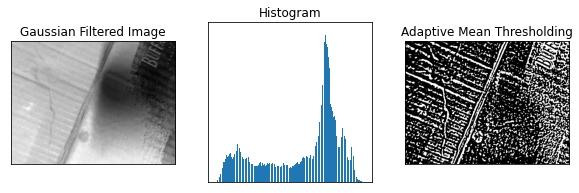

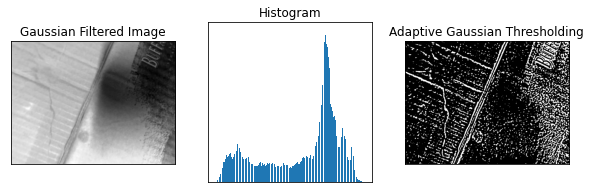

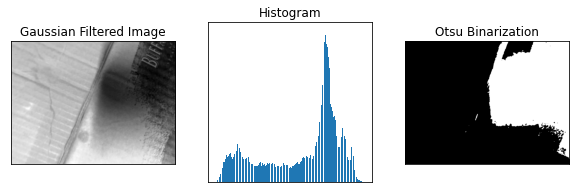

In [ ]:
# plot all the images and their histograms
images = [gaussian_blur_img, 0, adaptive_mean_img,
          gaussian_blur_img, 0, adaptive_gaussian_img,
          gaussian_blur_img, 0, otsu_img]

titles = ['Gaussian Filtered Image', 'Histogram', 'Adaptive Mean Thresholding',
          'Gaussian Filtered Image', 'Histogram', 'Adaptive Gaussian Thresholding',
          'Gaussian Filtered Image', 'Histogram', 'Otsu Binarization']

for i in range(3):
    figure_size = 10
    plt.figure(figsize=(figure_size,figure_size))

    # Blur Image
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]),plt.yticks([])

    # Histogram
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])

    #
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]),plt.yticks([])
plt.show()

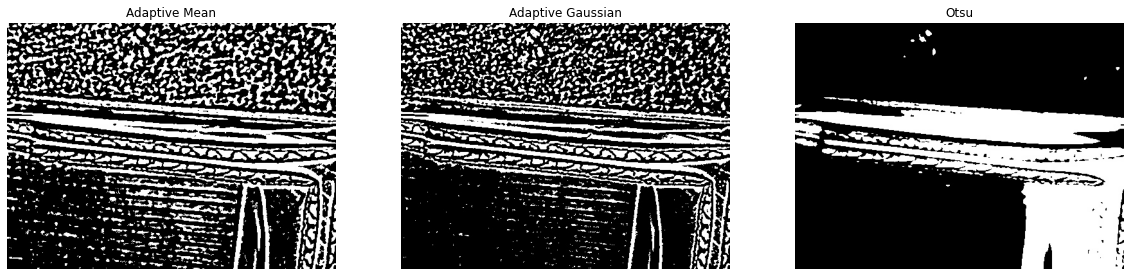

In [ ]:
sg1 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/cardboard/cardboard120.jpg",1)
sg1 = cv2.cvtColor(sg1, cv2.COLOR_BGR2RGB)
sg2 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/cardboard/cardboard120.jpg",1)
sg2 = cv2.cvtColor(sg2, cv2.COLOR_BGR2RGB)
sg3 = cv2.imread("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/cardboard/cardboard120.jpg",1)
sg3 = cv2.cvtColor(sg3, cv2.COLOR_BGR2RGB)

figure_size = 20
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(sg1),plt.axis("off")
plt.title('Adaptive Mean'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sg2),plt.axis("off")
plt.title('Adaptive Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sg3),plt.axis("off")
plt.title('Otsu'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/after_augmentation/plastic")))
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/after_augmentation/plastic")))
print(len(os.listdir("/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/after_augmentation/plastic")))

2410
2410
2410




---


# Ekstrasi Fitur


## Hu Moment

In [ ]:
classes = {
  "cardboard" : 1,
  "glass"     : 2,
  "metal"     : 3,
  "paper"     : 4,
  "plastic"   : 5
}

classes

{'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

def feature_extraction(data_file, dataset):
	dump = []

	print("Extracting Hu moments...")

	for c, idx in classes.items():
			class_folder = dataset + "{}/".format(c)

			for f in os.listdir(class_folder):
							fpath = class_folder + f
							nama_file = f.replace(".*", "")
							# nama = os.path.basename(fpath)

							img = cv.imread(fpath, cv.IMREAD_GRAYSCALE)
							# Membalik pixel citra, hitam -> putih dan sebaliknya
							img = cv.bitwise_not(img) #bisa dinonaktifkan, karena mempengaruhi nilai hu moment
							hu = cv.HuMoments(cv.moments(img))

							for i in range(0, 7):
								hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))

							hu = hu.reshape((1, 7)).tolist()[0] + [nama_file, idx]
							dump.append(hu)

			print(c, "ok!")

	cols = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7", "Nama File", "Kelas"]

	df = pd.DataFrame(dump, columns=cols)
	path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/"
	path = os.path.join(path, data_file)

	df.to_csv(path, index=None)

	print("Extraction done!")

In [ ]:
# data_file = "AdaptiveGaussianThres_5Class.csv"
data_file = "AdaptiveMeanThres_5Class.csv"
# data_file = "OtsuThres_5Class.csv"

# dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Gaussian Thresholding/"
dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Adaptive Mean Thresholding/"
# dataset = "/content/drive/MyDrive/Skripsi/Hasil Segmentasi/Otsu Binarization/"

feature_extraction(data_file, dataset)

Extracting Hu moments...
cardboard ok!
glass ok!
metal ok!
paper ok!
plastic ok!
Extraction done!


## Color Moment

Sumber :

*   https://developpaper.com/image-color-feature-extraction-color-histogram-color-moment-python/
*   https://www.kaggle.com/code/vievie31/planet-lbp-color-sobel-feature-extraction
*   https://github.com/giovannitjahyamulia/svm-glcm-colormoments-python
*   https://github.com/AkhmadMuzanni/KEMU
*   https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_hsv
- https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/



### 1 Citra

In [ ]:
# import the necessary packages
import numpy as np
import cv2

def color_moments(filename):
    img = cv2.imread(filename)
    nama = os.path.basename(filename)
    if img is None:
        return
    # Convert BGR to HSV colorspace
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(hsv)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment, nama])

    cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV", "Nama File"]

    # df = pd.DataFrame([color_feature], columns=cols)
    # path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/"
    # data_file = "ColorMoment_5Class.csv"
    # path = os.path.join(path, data_file)

    # df.to_csv(path, index=None)
    print("Extraction done!")
    return color_feature


In [ ]:
color_moments("/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg")

Extraction done!


[13.874496459960938,
 85.77412923177083,
 189.0046641031901,
 0.9753382955670522,
 10.469748264293376,
 34.50329225637778,
 1.2946550595011266,
 14.685489976243185,
 40.02790320966536,
 'cardboard1.jpg']

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg')
resized = cv2.resize(img, (256, 256))
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
h_mean = np.mean(h)  # np.sum(h)/float(N)
s_mean = np.mean(s)  # np.sum(s)/float(N)
v_mean = np.mean(v)  # np.sum(v)/float(N)
print(f"{h_mean}")
print(f"{s_mean}")
print(f"{v_mean}")

13.876495361328125
85.74795532226562
188.9852752685547


### Banyak Citra

In [ ]:
classes = {
  "cardboard" : 1,
  "glass"     : 2,
  "metal"     : 3,
  "paper"     : 4,
  "plastic"   : 5
}

classes

{'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

def feature_extraction(data_file, dataset):
	dump = []

	print("Extracting Color moments...")

	for c, idx in classes.items():
			class_folder = dataset + "{}/".format(c)

			for f in os.listdir(class_folder):
							fpath = class_folder + f
							nama_file = f.replace(".*", "")
							# nama = os.path.basename(fpath)

							img = cv2.imread(fpath)
							# Convert BGR to HSV colorspace
							hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
							# Split the channels - h,s,v
							h, s, v = cv2.split(hsv)
							# Initialize the color feature
							color_feature = []
							# N = h.shape[0] * h.shape[1]
							# The first central moment - average
							h_mean = np.mean(h)  # np.sum(h)/float(N)
							s_mean = np.mean(s)  # np.sum(s)/float(N)
							v_mean = np.mean(v)  # np.sum(v)/float(N)
							color_feature.extend([h_mean, s_mean, v_mean])
							# The second central moment - standard deviation
							h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
							s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
							v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
							color_feature.extend([h_std, s_std, v_std])

							# The third central moment - the third root of the skewness
							h_skewness = np.mean(abs(h - h.mean())**3)
							s_skewness = np.mean(abs(s - s.mean())**3)
							v_skewness = np.mean(abs(v - v.mean())**3)
							h_thirdMoment = h_skewness**(1./3)
							s_thirdMoment = s_skewness**(1./3)
							v_thirdMoment = v_skewness**(1./3)
							color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment, nama_file, idx])
							dump.append(color_feature)

			print(c, "ok!")

	cols = ["meanH", "meanS", "meanV", "stdH", "stdS", "stdV", "skewH", "skewS", "skewV", "Nama File", "Kelas"]

	df = pd.DataFrame(dump, columns=cols)
	path = path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/"
	path = os.path.join(path, data_file)

	df.to_csv(path, index=None)

	print("Extraction done!")

In [ ]:
data_file = "ColorMoment_5Class.csv"

dataset = "/content/drive/MyDrive/Skripsi/dataset-resized/"

feature_extraction(data_file, dataset)

Extracting Color moments...
cardboard ok!
glass ok!
metal ok!
paper ok!
plastic ok!
Extraction done!


## Hu Moment + Color Moment

Concatenate nilai fitur dalam file csv Hu Moment & Color Moment

Skenario penggabungan :

*   Color Moment + Hu Moment (dari citra biner hasil Adaptive Gaussian Thresholding)
*   Color Moment + Hu Moment (dari citra biner hasil Adaptive Mean Thresholding)
*   Color Moment + Hu Moment (dari citra biner hasil Otsu Thresholding)

code reference :

*   https://kotakode.com/pertanyaan/807/Bagaimana-cara-menggabungkan-2-dataset-dengan-format-.csv-dan-bisa-di-unduh.
*   https://www.pengembangan-web-mp-pd.com/id/python/python-python-menggabungkan-beberapa-file-csv/836892304/




In [ ]:
color1 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv"

hu1 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveGaussianThres_5Class.csv"
hu2 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveMeanThres_5Class.csv"
hu3 = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/OtsuThres_5Class.csv"

import pandas as pd

# result.to_csv('SimpanFile.csv', index = False) # Simpan dataframe menjadi file SimpanFile.csv

ColorMoment = pd.read_csv(color1)
HuMoment = pd.read_csv(hu3).drop(['Nama File', 'Kelas'], axis=1)

frames = [HuMoment, ColorMoment]
result = pd.concat(frames, axis=1)  #axis=1 utk join kolom

path = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/"
data_file = "Hu(Otsu)&ColorMoment_5Class.csv"

path = os.path.join(path, data_file)
result.to_csv(path, index=None)

result

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,2.943193,6.225992,9.678991,10.346655,21.012902,13.734476,-20.370465,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,3.065105,6.848082,9.890342,11.326040,-22.037549,-14.984824,-22.145133,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,2.596566,5.671922,9.255627,9.326112,18.761660,-13.119318,18.773494,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,3.147344,7.339382,10.544086,12.050876,-24.099367,-15.782035,-23.355301,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,2.723624,6.337061,9.122112,9.066721,18.265112,12.473797,-18.370968,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,3.050122,7.155058,10.156189,10.902986,21.573494,15.228501,21.593128,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,3.143714,7.045371,10.583454,11.952406,-23.227825,-15.476588,23.955223,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,3.049965,6.643618,10.774616,14.229202,-26.834503,18.333602,-26.941894,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,2.999322,6.716665,9.393075,10.883226,21.163913,15.756824,-21.180176,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


In [ ]:
HuMoment = pd.read_csv(hu2)
HuMoment

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,Nama File,Kelas
0,2.517659,5.862698,10.481850,11.031401,-21.789747,-14.166610,-22.839493,cardboard1.jpg,1
1,2.627297,6.474835,10.237757,10.357361,20.726640,13.795593,20.930351,cardboard10.jpg,1
2,2.363082,5.639875,8.201446,9.602367,18.505325,12.489457,19.662425,cardboard100.jpg,1
3,2.467478,6.245169,8.883821,8.889658,17.776458,12.029887,19.553480,cardboard101.jpg,1
4,2.563102,6.191423,9.863585,9.828799,19.719727,12.927006,20.040025,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...
2385,2.717037,6.143017,10.870418,9.404450,19.554404,12.487703,20.167690,plastic96.jpg,5
2386,2.579009,5.687186,8.979605,9.700240,-19.401992,-14.029121,-19.085638,plastic95.jpg,5
2387,2.387834,6.048637,9.111253,9.354089,-18.586762,-12.474413,21.137106,plastic97.jpg,5
2388,2.651608,7.431459,10.330725,10.058484,21.197510,-13.777788,-20.255912,plastic98.jpg,5


In [ ]:
ColorMoment = pd.read_csv(color1)
ColorMoment

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...
2385,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


# Klasifikasi

Classifier : SVM

Referensi SVM :
- https://statquest.org/video-index/
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
- https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/
- https://stats.stackexchange.com/questions/348318/degree-parameter-for-svm-polynomial-kernel

In [ ]:
import joblib
from sklearn.svm import SVC as SVM
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split as data_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# import dataset
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/tanpa augmentation/AdaptiveMeanThres_5Class.csv")
df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv")
# df = pd.read_csv("/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/Hu(Mean)&ColorMoment_5Class.csv")

In [ ]:
df

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV,Nama File,Kelas
0,13.874496,85.774129,189.004664,0.975338,10.469748,34.503292,1.294655,14.685490,40.027903,cardboard1.jpg,1
1,16.738032,60.765549,186.168747,16.698673,15.049106,41.148602,31.875396,18.480281,54.838001,cardboard10.jpg,1
2,38.806753,24.308985,187.876694,40.511856,45.566601,37.164346,51.453111,60.796599,44.779825,cardboard100.jpg,1
3,16.333288,103.312948,148.703237,2.053065,60.639688,62.842384,2.486562,62.986500,66.486885,cardboard101.jpg,1
4,30.955012,39.384954,173.667435,30.856430,38.058877,39.142017,38.857629,40.186078,42.849296,cardboard102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...
2385,46.405375,29.574234,174.566162,38.318357,30.629493,32.218107,41.633355,51.267794,39.307113,plastic96.jpg,5
2386,23.467972,83.858892,130.389542,8.378999,61.440617,85.933313,12.536109,70.597542,91.531496,plastic95.jpg,5
2387,26.684107,19.456248,172.215068,31.449758,32.159472,31.977331,51.689526,52.025051,35.255842,plastic97.jpg,5
2388,27.420888,76.165385,186.336019,35.372883,54.103764,40.477887,54.559060,66.825605,45.483353,plastic98.jpg,5


In [ ]:
len(df)

2390

In [ ]:
# df.iloc[index row, index column]
df.iloc[259,:] # ":" sebagai step

meanH               16.771637
meanS               88.966604
meanV              184.147003
stdH                 3.226272
stdS                 16.97344
stdV                46.610136
skewH                9.180959
skewS               27.363165
skewV               56.523426
Nama File    cardboard332.jpg
Kelas                       1
Name: 259, dtype: object

In [ ]:
X = df.drop(["Nama File", "Kelas"], axis=1)
# X = df.drop(["Kelas"], axis=1) # Untuk Cek Nama File pada Normalisasi
y = df["Kelas"]
# y = df.iloc[:,-1:].values.ravel()

X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV
259,16.771637,88.966604,184.147003,3.226272,16.973440,46.610136,9.180959,27.363165,56.523426
402,18.020147,75.323064,171.842005,6.569589,17.236139,60.114902,10.792717,21.590670,67.237664
2304,21.529719,22.988480,196.497620,14.558959,9.918123,21.337911,27.867836,13.620382,27.578539
1932,17.113251,21.427088,171.723363,3.976025,5.936691,8.408057,7.352633,6.687350,10.872819
986,16.537059,31.400625,145.501506,12.030908,14.795481,29.901953,25.482360,19.517366,36.653123
...,...,...,...,...,...,...,...,...,...
1638,34.286341,20.682917,165.135473,32.294929,27.498314,49.740649,40.922671,34.699045,58.401514
1095,21.805394,12.806391,191.624639,14.852719,9.348188,35.498139,25.787525,18.644575,46.069667
1130,16.214406,43.882055,202.488063,2.700576,30.722928,30.457516,5.951304,43.425935,38.725464
1294,121.833552,69.241948,182.057353,44.937427,87.555368,45.909234,56.368064,98.369586,53.046250


In [ ]:
X_test

,meanH,meanS,meanV,stdH,stdS,stdV,skewH,skewS,skewV
1321,38.105988,31.778249,185.563446,36.683601,56.210809,53.468076,45.911764,75.080187,63.864103
1413,14.083755,30.724121,197.002106,7.624568,17.236065,39.889005,16.435709,23.873835,46.001487
530,14.493896,29.204600,152.825099,4.598349,8.999668,11.427257,9.232303,10.324378,14.419225
554,11.855265,58.499237,167.626246,5.098269,9.630014,18.612239,11.618598,12.948108,24.116831
229,14.787404,77.667684,188.211858,0.973276,24.916938,37.183282,1.162433,28.631673,41.945773
...,...,...,...,...,...,...,...,...,...
1261,26.962896,26.125763,96.831207,25.795201,22.309243,51.961786,40.166108,34.911734,59.818758
1270,21.129420,35.899653,173.883108,15.958807,18.041539,74.909341,27.415747,31.096465,81.147460
834,18.455190,48.604975,174.752833,2.114884,15.493155,32.069340,4.543602,20.727820,36.842530
668,15.367320,63.201747,176.131592,2.446542,11.933707,31.173978,3.304389,17.554255,36.809569


In [ ]:
y_train

259     1
402     1
2304    5
1932    5
986     3
       ..
1638    4
1095    3
1130    3
1294    3
860     2
Name: Kelas, Length: 2151, dtype: int64

In [ ]:
y_test

1321    4
1413    4
530     2
554     2
229     1
       ..
1261    3
1270    3
834     2
668     2
1506    4
Name: Kelas, Length: 239, dtype: int64

In [ ]:
print(f'Jumlah data latih : {len(X_train)} data')
print(f'Jumlah data uji : {len(X_test)} data')

Jumlah data latih : 2151 data
Jumlah data uji : 239 data


In [ ]:
# Standarisasi fitur
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.0392308 , 0.50651352, 0.70227973, ..., 0.10250459, 0.21994001,
        0.49027136],
       [0.04921823, 0.4266332 , 0.61997406, ..., 0.12157556, 0.16741146,
        0.5982639 ],
       [0.07729298, 0.12022421, 0.78489054, ..., 0.32361521, 0.09488344,
        0.19852577],
       ...,
       [0.03477325, 0.2425521 , 0.82495942, ..., 0.06429003, 0.36610799,
        0.31087951],
       [0.87967137, 0.39102943, 0.68830248, ..., 0.66084133, 0.8660842 ,
        0.45522369],
       [0.70377658, 0.15875693, 0.77227695, ..., 0.48097075, 0.56758512,
        0.44934329]])

In [ ]:
X_test

array([[0.20989449, 0.17168663, 0.71175404, ..., 0.5371182 , 0.65415534,
        0.5642606 ],
       [0.01772915, 0.16551491, 0.78826495, ..., 0.1883457 , 0.18818781,
        0.38421707],
       [0.02101007, 0.1566184 , 0.49277377, ..., 0.10311212, 0.06489047,
        0.06588846],
       ...,
       [0.05269835, 0.2702039 , 0.63944401, ..., 0.04763354, 0.1595597 ,
        0.29190076],
       [0.027997  , 0.35566521, 0.64866625, ..., 0.03297067, 0.1306809 ,
        0.29156853],
       [0.21357447, 0.07389648, 0.72342038, ..., 0.67327142, 0.10543631,
        0.20386079]])

In [ ]:
y_train

259     1
402     1
2304    5
1932    5
986     3
       ..
1638    4
1095    3
1130    3
1294    3
860     2
Name: Kelas, Length: 2151, dtype: int64

In [ ]:
y_test

1321    4
1413    4
530     2
554     2
229     1
       ..
1261    3
1270    3
834     2
668     2
1506    4
Name: Kelas, Length: 239, dtype: int64

### Kernel RBF

GridSearchCV Kernel RBF

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gsc = GridSearchCV(estimator=SVM(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto'],
                         'kernel': ['rbf'],
                         'decision_function_shape':['ovr']
                         },
             cv=kfold)

In [ ]:
result = gsc.fit(X_train, y_train)
result.best_params_

{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
print(f"The best parameters are {result.best_params_} with a score of {result.best_score_} %")

The best parameters are {'C': 100, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'} with a score of 0.7563931955211024 %


In [ ]:
import joblib

#save your model or results
joblib.dump(result, '/content/drive/MyDrive/rbf_1b_2a.pkl')

['/content/drive/MyDrive/rbf_1b_2a.pkl']

In [ ]:
#load your model for further usage
result = joblib.load("/content/drive/MyDrive/rbf_1b_2a.pkl")

In [ ]:
print(result)
print(result.best_params_)
print(result.best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'decision_function_shape': ['ovr'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 'scale', 'auto'],
                         'kernel': ['rbf']})
{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
0.7563931955211024


In [ ]:
# Score the grid search model with the testing data
print(f'{result.score(X_test, y_test)}')

0.7824267782426778


In [ ]:
clf = SVM(**result.best_params_)
clf.fit(X_train, y_train)
# result.best_params_

SVC(C=100)

Confusion Matrix:
 [[28  3  1  1  2]
 [ 1 44  2  2  5]
 [ 4  5 33  3  0]
 [ 2  3  4 50  2]
 [ 1  8  2  1 32]]
Accuracy: 0.7824267782426778
Precision: 0.7839171098477902
Recall: 0.7790186013136833
F1 Score: 0.7799777279494708


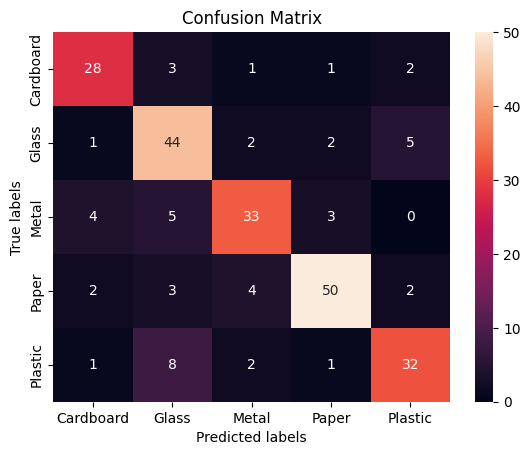

In [ ]:
kelas_prediksi = clf.predict(X_test)
kelas_aktual = y_test.values
label_kelas = [1, 2, 3, 4, 5]
label_kelas_str = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic']

cm = confusion_matrix(kelas_aktual, kelas_prediksi, labels=label_kelas)
# calculate accuracy
accuracy = accuracy_score(kelas_aktual, kelas_prediksi)

# calculate precision
precision = precision_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate recall
recall = recall_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate F1 score
f1 = f1_score(kelas_aktual, kelas_prediksi, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# create a heatmap from the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_kelas_str)
ax.yaxis.set_ticklabels(label_kelas_str)

plt.show()

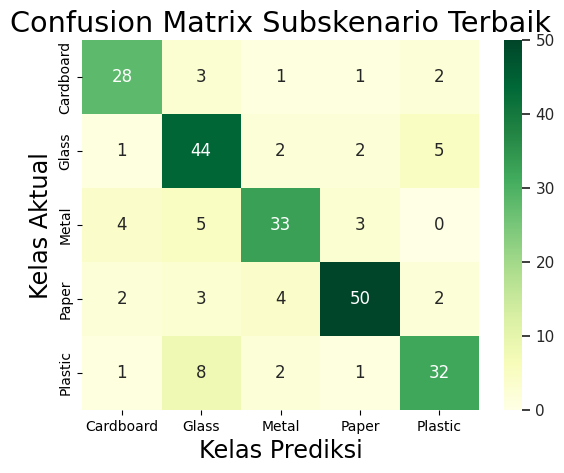

In [ ]:
# create a heatmap from the confusion matrix
ax = plt.subplot()
# Set the figure size
sns.set(rc={'figure.figsize':(8,6)})
# Plot the heatmap
sns.heatmap(cm, cmap="YlGn", annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Kelas Prediksi', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Kelas Aktual', fontdict={'fontsize':'x-large'})
ax.set_title('Confusion Matrix Subskenario Terbaik', fontdict={'fontsize':'xx-large'})
ax.xaxis.set_ticklabels(label_kelas_str)
ax.yaxis.set_ticklabels(label_kelas_str)

plt.show()

In [ ]:
rbf_gridsearch = pd.DataFrame(data=result.cv_results_).sort_values(by='rank_test_score', ascending=True)
rbf_gridsearch.to_csv('/content/drive/MyDrive/rbf_gridsearch_1b2a.csv')
rbf_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
75,0.253934,0.009935,0.015897,0.000360,100,ovr,scale,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.754630,...,0.753488,0.720930,0.781395,0.809302,0.716279,0.744186,0.776744,0.756393,0.026235,1
81,0.723261,0.037953,0.015163,0.000559,1000,ovr,1,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.731481,...,0.739535,0.739535,0.781395,0.800000,0.720930,0.716279,0.762791,0.747567,0.025227,2
60,0.163296,0.007930,0.018046,0.000410,10,ovr,10,rbf,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.722222,...,0.706977,0.697674,0.762791,0.818605,0.702326,0.725581,0.767442,0.743385,0.037005,3
86,0.662824,0.034813,0.014577,0.000480,1000,ovr,scale,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.731481,...,0.716279,0.739535,0.730233,0.762791,0.711628,0.711628,0.762791,0.728962,0.021127,4
71,0.351297,0.069191,0.029604,0.006614,100,ovr,10,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.736111,...,0.688372,0.697674,0.753488,0.790698,0.679070,0.697674,0.758140,0.728960,0.035448,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.239304,0.006005,0.026551,0.000437,1,ovr,0.001,rbf,"{'C': 1, 'decision_function_shape': 'ovr', 'ga...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
11,0.375728,0.095516,0.044527,0.011257,0.001,ovr,0.0001,rbf,"{'C': 0.001, 'decision_function_shape': 'ovr',...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
12,0.287351,0.085970,0.032795,0.010069,0.001,ovr,0.001,rbf,"{'C': 0.001, 'decision_function_shape': 'ovr',...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
28,0.250394,0.008610,0.027358,0.003119,0.01,ovr,100,rbf,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61


In [ ]:
rbf_gridsearch = pd.DataFrame(data=result.cv_results_)
rbf_ovr_gs = rbf_gridsearch[rbf_gridsearch['param_decision_function_shape']=='ovr']
rbf_ovr_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.347471,0.180496,0.037641,0.015668,0.0001,ovr,0.0001,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
1,0.236021,0.007267,0.027654,0.003783,0.0001,ovr,0.001,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
2,0.377478,0.097702,0.044496,0.011850,0.0001,ovr,0.01,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
3,0.297667,0.091399,0.031427,0.009628,0.0001,ovr,0.1,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
4,0.237995,0.007457,0.027946,0.003383,0.0001,ovr,1,rbf,"{'C': 0.0001, 'decision_function_shape': 'ovr'...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.310946,0.006657,0.025092,0.000359,10000,ovr,100,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.740741,...,0.697674,0.660465,0.711628,0.711628,0.655814,0.674419,0.711628,0.692679,0.025484,16
95,0.533135,0.049046,0.041088,0.003075,10000,ovr,1000,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.324074,...,0.283721,0.311628,0.297674,0.306977,0.293023,0.325581,0.297674,0.304966,0.012449,49
96,0.713850,0.276977,0.057212,0.025494,10000,ovr,10000,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.250000,...,0.246512,0.251163,0.246512,0.251163,0.246512,0.251163,0.255814,0.249651,0.002944,56
97,1.653123,0.434962,0.016048,0.004487,10000,ovr,scale,rbf,"{'C': 10000, 'decision_function_shape': 'ovr',...",0.675926,...,0.697674,0.711628,0.734884,0.753488,0.697674,0.683721,0.720930,0.712709,0.023180,11


In [ ]:
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']

scores = rbf_gridsearch["mean_test_score"]
scores.values.reshape(len(C_range), len(gamma_range))

array([[0.7563932 , 0.74756675, 0.74338501, 0.7289621 , 0.72895995,
        0.7271081 , 0.72477606, 0.72477606, 0.72430879, 0.71547588,
        0.71270887],
       [0.71036822, 0.70478252, 0.70245478, 0.69314599, 0.69267873,
        0.69267873, 0.69267873, 0.69267873, 0.66527778, 0.66527562,
        0.66155685],
       [0.64388243, 0.64157192, 0.64016365, 0.63876615, 0.61971576,
        0.61739449, 0.61739449, 0.60157623, 0.59739018, 0.59414513,
        0.58343454],
       [0.57413867, 0.56995693, 0.56112188, 0.56065676, 0.56019165,
        0.55832903, 0.54949397, 0.54902885, 0.54856374, 0.37098837,
        0.36261843],
       [0.36261843, 0.3616882 , 0.3588975 , 0.32821921, 0.30496555,
        0.30496555, 0.30496555, 0.30496555, 0.29102283, 0.27894272,
        0.26871232],
       [0.24965116, 0.24965116, 0.24965116, 0.24965116, 0.24965116,
        0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 ,
        0.2477907 ],
       [0.2477907 , 0.2477907 , 0.2477907 , 0.2477907 , 0.

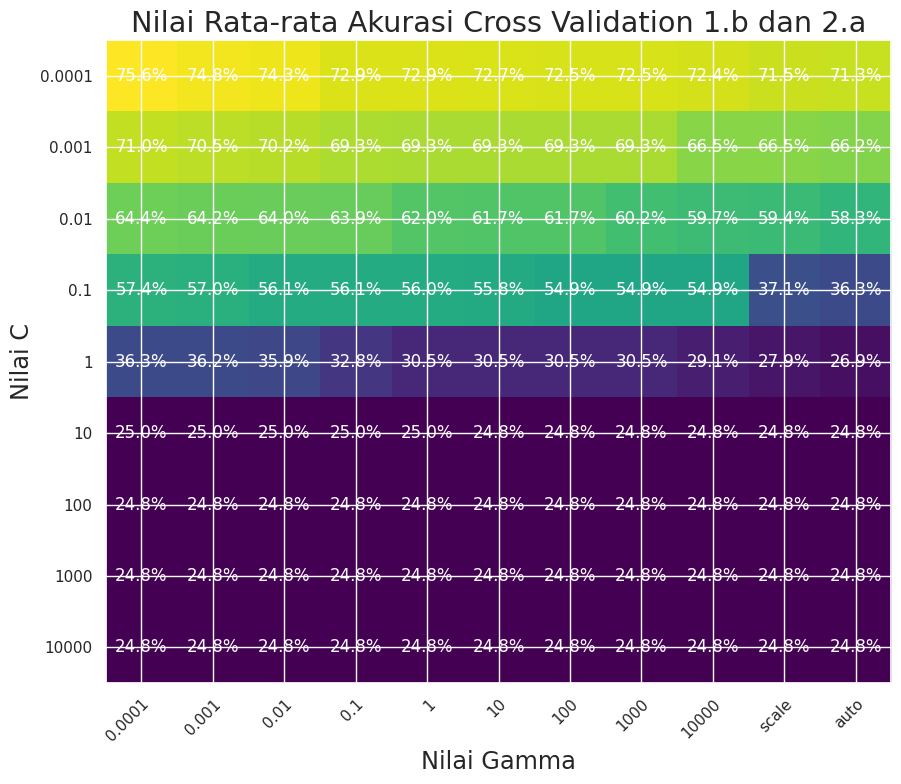

In [ ]:
# Visualisasi
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']

scores = rbf_gridsearch["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.a", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

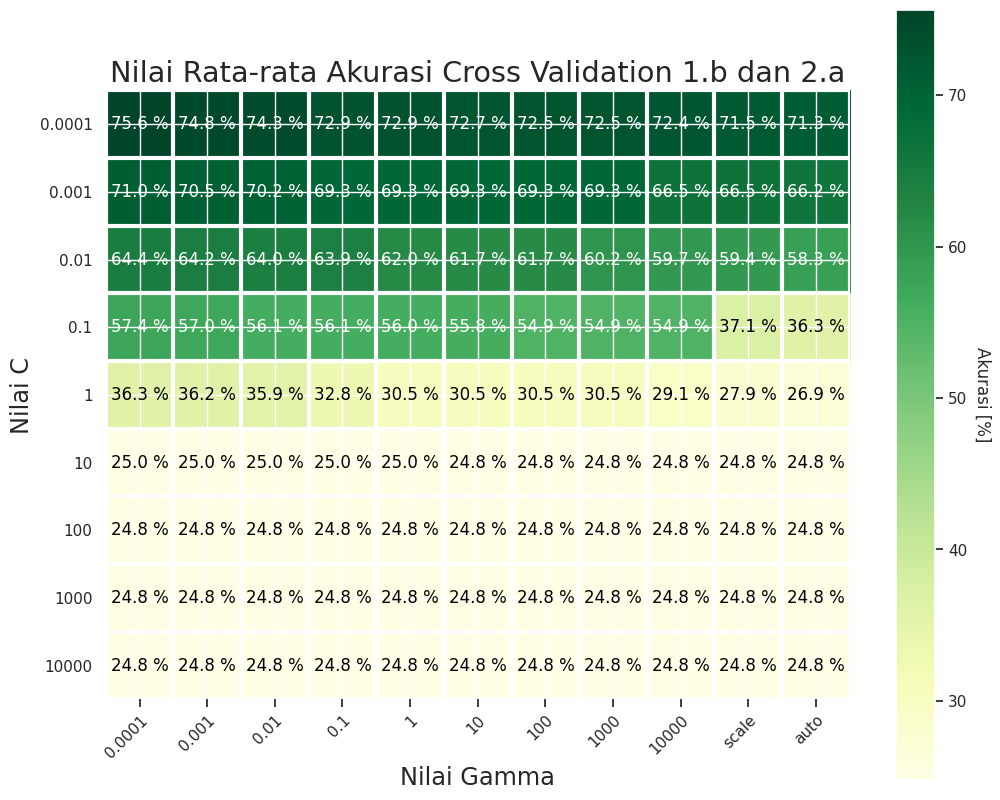

In [ ]:
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']
scores = rbf_gridsearch["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.a", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Akurasi [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

In [ ]:
rbf_gridsearch = pd.DataFrame(data=result.cv_results_).sort_values(by='rank_test_score', ascending=True)
rbf_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
75,0.253934,0.009935,0.015897,0.000360,100,ovr,scale,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.754630,...,0.753488,0.720930,0.781395,0.809302,0.716279,0.744186,0.776744,0.756393,0.026235,1
81,0.723261,0.037953,0.015163,0.000559,1000,ovr,1,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.731481,...,0.739535,0.739535,0.781395,0.800000,0.720930,0.716279,0.762791,0.747567,0.025227,2
60,0.163296,0.007930,0.018046,0.000410,10,ovr,10,rbf,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.722222,...,0.706977,0.697674,0.762791,0.818605,0.702326,0.725581,0.767442,0.743385,0.037005,3
86,0.662824,0.034813,0.014577,0.000480,1000,ovr,scale,rbf,"{'C': 1000, 'decision_function_shape': 'ovr', ...",0.731481,...,0.716279,0.739535,0.730233,0.762791,0.711628,0.711628,0.762791,0.728962,0.021127,4
71,0.351297,0.069191,0.029604,0.006614,100,ovr,10,rbf,"{'C': 100, 'decision_function_shape': 'ovr', '...",0.736111,...,0.688372,0.697674,0.753488,0.790698,0.679070,0.697674,0.758140,0.728960,0.035448,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.239304,0.006005,0.026551,0.000437,1,ovr,0.001,rbf,"{'C': 1, 'decision_function_shape': 'ovr', 'ga...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
11,0.375728,0.095516,0.044527,0.011257,0.001,ovr,0.0001,rbf,"{'C': 0.001, 'decision_function_shape': 'ovr',...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
12,0.287351,0.085970,0.032795,0.010069,0.001,ovr,0.001,rbf,"{'C': 0.001, 'decision_function_shape': 'ovr',...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61
28,0.250394,0.008610,0.027358,0.003119,0.01,ovr,100,rbf,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",0.250000,...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,61


### Kernel Polynomial

GridSearchCV Kernel Polynomial

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gsc = GridSearchCV(estimator=SVM(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 'auto', 'scale'],
                         'degree': [2,3],
                         'kernel': ['poly'],
                         'decision_function_shape': ['ovr']
                        },
             cv=kfold)

In [ ]:
result = gsc.fit(X_train, y_train)
result.best_params_

{'C': 1000,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

In [ ]:
print(result.best_params_)
print(result.best_score_)

{'C': 1000, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.7192032730404824


In [ ]:
n_features = X_train.shape[1]
gamma_scale = 1 / (n_features * X_train.var()) # gamma : 'scale'
gamma_auto = 1 / n_features # gamma : 'auto'
print(f'n_features: {n_features}')
print(f'gamma_scale: {gamma_scale}')
print(f'gamma_auto: {gamma_auto}')

n_features: 9
gamma_scale: 2.1258728904021194
gamma_auto: 0.1111111111111111


In [ ]:
import joblib

#save your model or results
joblib.dump(result, '/content/drive/MyDrive/poly_1b_2b.pkl')

['/content/drive/MyDrive/poly_1b_2b.pkl']

In [ ]:
#load your model for further usage
result = joblib.load("/content/drive/MyDrive/poly_1b_2b.pkl")

In [ ]:
# Score the grid search model with the testing data
print(f'{result.score(X_test, y_test)}')

0.7615062761506276


In [ ]:
print(result)
print(result.best_params_)
print(result.best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo'], 'degree': [2, 3],
                         'gamma': [0.1, 1, 'auto', 'scale'],
                         'kernel': ['poly']})
{'C': 1000, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.7192032730404824


In [ ]:
clf = SVM(**result.best_params_)
clf.fit(X_train, y_train)

SVC(C=1000, decision_function_shape='ovo', kernel='poly')

Confusion Matrix:
 [[29  3  1  1  1]
 [ 2 43  3  3  3]
 [ 2  8 30  4  1]
 [ 2  5  3 50  1]
 [ 2  7  2  3 30]]
Accuracy: 0.7615062761506276
Precision: 0.7715070338021157
Recall: 0.7586049409000228
F1 Score: 0.7612360135310955


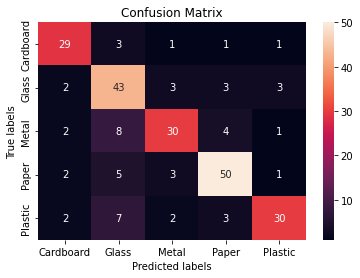

In [ ]:
kelas_prediksi = clf.predict(X_test)
kelas_aktual = y_test.values
label_kelas = [1, 2, 3, 4, 5]
label_kelas_str = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic']

cm = confusion_matrix(kelas_aktual, kelas_prediksi, labels=label_kelas)
# calculate accuracy
accuracy = accuracy_score(kelas_aktual, kelas_prediksi)

# calculate precision
precision = precision_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate recall
recall = recall_score(kelas_aktual, kelas_prediksi, average='macro')

# calculate F1 score
f1 = f1_score(kelas_aktual, kelas_prediksi, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# create a heatmap from the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_kelas_str)
ax.yaxis.set_ticklabels(label_kelas_str)

plt.show()

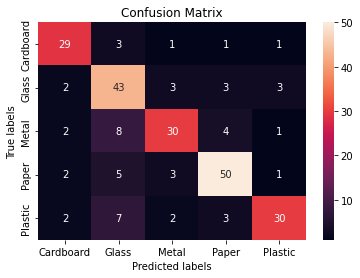

In [ ]:
# create a heatmap from the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_kelas_str)
ax.yaxis.set_ticklabels(label_kelas_str)

plt.show()

In [ ]:
result.cv_results_

{'mean_fit_time': array([  0.18477006,   0.17639596,   0.18053651,   0.14754677,
          0.17802682,   0.15912223,   0.18127732,   0.13572085,
          0.17849183,   0.17282703,   0.18234012,   0.14727371,
          0.17693679,   0.15813148,   0.17783504,   0.1331439 ,
          0.18047459,   0.13679204,   0.18037782,   0.12875073,
          0.18072748,   0.13186331,   0.18050005,   0.14199116,
          0.18134811,   0.13803411,   0.18038015,   0.12952228,
          0.18053479,   0.1326936 ,   0.18044348,   0.14151192,
          0.17140398,   0.13009961,   0.16749291,   0.14499278,
          0.18064616,   0.14079554,   0.18099608,   0.26144047,
          0.17504721,   0.13086772,   0.16887922,   0.14530957,
          0.18139181,   0.14232585,   0.18065832,   0.25858438,
          0.13536251,   0.17283213,   0.13417687,   0.33158078,
          0.15916519,   0.26110458,   0.15379434,   1.36213336,
          0.13771212,   0.17226558,   0.13487208,   0.33270099,
          0.15831192,  

In [ ]:
poly_gridsearch = pd.DataFrame(data=result.cv_results_).sort_values(by='rank_test_score', ascending=True)
poly_gridsearch.to_csv('/content/drive/MyDrive/poly_gridsearch_1b2b.csv')
poly_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
95,109.508598,6.174301,0.007778,0.000300,1000,ovr,3,scale,poly,"{'C': 1000, 'decision_function_shape': 'ovr', ...",...,0.716279,0.688372,0.753488,0.800000,0.720930,0.683721,0.720930,0.719203,0.033590,1
87,109.243007,6.388352,0.007883,0.000655,1000,ovo,3,scale,poly,"{'C': 1000, 'decision_function_shape': 'ovo', ...",...,0.716279,0.688372,0.753488,0.800000,0.720930,0.683721,0.720930,0.719203,0.033590,1
79,11.035262,0.919655,0.008183,0.000547,100,ovr,3,scale,poly,"{'C': 100, 'decision_function_shape': 'ovr', '...",...,0.693023,0.660465,0.758140,0.744186,0.683721,0.693023,0.711628,0.703872,0.028296,3
71,11.039398,0.932672,0.007980,0.000106,100,ovo,3,scale,poly,"{'C': 100, 'decision_function_shape': 'ovo', '...",...,0.693023,0.660465,0.758140,0.744186,0.683721,0.693023,0.711628,0.703872,0.028296,3
93,11.226026,0.850983,0.008249,0.000603,1000,ovr,3,1,poly,"{'C': 1000, 'decision_function_shape': 'ovr', ...",...,0.688372,0.665116,0.753488,0.739535,0.679070,0.697674,0.711628,0.702944,0.027213,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0.180443,0.002910,0.013787,0.000529,0.1,ovr,3,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,79
28,0.180535,0.003671,0.013596,0.000610,0.1,ovr,3,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,79
26,0.180380,0.002927,0.014490,0.002593,0.1,ovr,2,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,79
8,0.178492,0.003977,0.013117,0.000158,0.01,ovr,2,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovr', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,79


In [ ]:
poly_gridsearch = pd.DataFrame(data=result.cv_results_)
poly_ovo_gs = poly_gridsearch[poly_gridsearch['param_decision_function_shape']=='ovo']
poly_ovo_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137404,0.004485,0.010989,0.000540,0.01,ovo,2,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
1,0.129488,0.003347,0.011279,0.001497,0.01,ovo,2,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.367442,0.418605,0.427907,0.446512,0.395349,0.427907,0.451163,0.419800,0.024166,37
2,0.142685,0.021668,0.011853,0.002978,0.01,ovo,2,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
3,0.214108,0.008787,0.016961,0.002246,0.01,ovo,2,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.553488,0.483721,0.553488,0.558140,0.534884,0.516279,0.572093,0.532293,0.034529,32
4,0.131769,0.002436,0.010633,0.000225,0.01,ovo,3,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
5,0.116852,0.003368,0.010388,0.000263,0.01,ovo,3,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.474419,0.469767,0.483721,0.502326,0.469767,0.465116,0.511628,0.486744,0.016314,34
6,0.131380,0.003215,0.010783,0.000454,0.01,ovo,3,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
7,0.099793,0.003008,0.009106,0.000158,0.01,ovo,3,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.567442,0.520930,0.590698,0.613953,0.562791,0.586047,0.632558,0.569492,0.040822,26
8,0.134434,0.002632,0.011081,0.000917,0.1,ovo,2,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
9,0.102510,0.003089,0.009764,0.000142,0.1,ovo,2,1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.539535,0.506977,0.567442,0.595349,0.567442,0.562791,0.604651,0.555536,0.036843,31


In [ ]:
poly_ovo_2_gs = poly_ovo_gs[poly_ovo_gs['param_degree']==2]
poly_ovo_2_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137404,0.004485,0.010989,0.000540,0.01,ovo,2,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
1,0.129488,0.003347,0.011279,0.001497,0.01,ovo,2,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.367442,0.418605,0.427907,0.446512,0.395349,0.427907,0.451163,0.419800,0.024166,37
2,0.142685,0.021668,0.011853,0.002978,0.01,ovo,2,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
3,0.214108,0.008787,0.016961,0.002246,0.01,ovo,2,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.553488,0.483721,0.553488,0.558140,0.534884,0.516279,0.572093,0.532293,0.034529,32
8,0.134434,0.002632,0.011081,0.000917,0.1,ovo,2,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
9,0.102510,0.003089,0.009764,0.000142,0.1,ovo,2,1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.539535,0.506977,0.567442,0.595349,0.567442,0.562791,0.604651,0.555536,0.036843,31
10,0.134003,0.005124,0.010778,0.000239,0.1,ovo,2,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
11,0.124736,0.038799,0.011706,0.002905,0.1,ovo,2,scale,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.572093,0.548837,0.609302,0.623256,0.581395,0.595349,0.651163,0.586695,0.037617,24
16,0.127851,0.003901,0.010708,0.000192,1,ovo,2,0.1,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",...,0.367442,0.418605,0.427907,0.446512,0.395349,0.427907,0.451163,0.419800,0.024166,37
17,0.099222,0.002454,0.008608,0.000294,1,ovo,2,1,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",...,0.572093,0.553488,0.627907,0.665116,0.590698,0.609302,0.665116,0.602515,0.040989,21


In [ ]:
C_range = [0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovo_2_gs["mean_test_score"]
scores = scores.values.reshape(len(C_range), len(gamma_range))

print(scores)
print(type(scores))
print(np.amax(scores))

[[0.2477907  0.41979974 0.2477907  0.53229328]
 [0.2477907  0.55553618 0.2477907  0.58669466]
 [0.41979974 0.60251507 0.45698751 0.62761628]
 [0.55599914 0.63784668 0.56576443 0.65644703]
 [0.60251507 0.65969638 0.60019165 0.65783376]
 [0.63784668 0.6606137  0.6411025  0.66666021]]
<class 'numpy.ndarray'>
0.6666602067183461


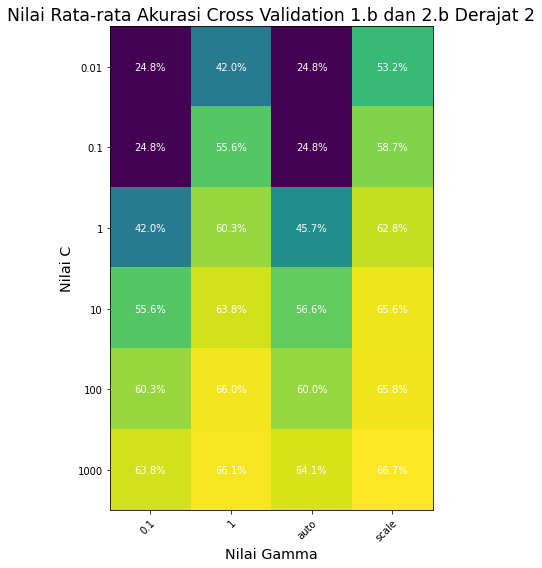

In [ ]:
# Visualisasi
C_range = [0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovo_2_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.b Derajat 2", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

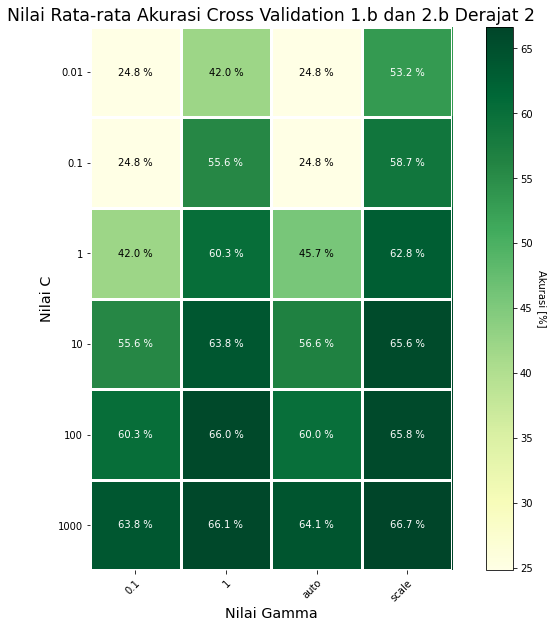

In [ ]:
C_range = [0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [0.1, 1, 'auto', 'scale']
scores = poly_ovo_2_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.b Derajat 2", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Akurasi [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

In [ ]:
poly_ovo_3_gs = poly_ovo_gs[poly_ovo_gs['param_degree']==3]
poly_ovo_3_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.131769,0.002436,0.010633,0.000225,0.01,ovo,3,0.1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
5,0.116852,0.003368,0.010388,0.000263,0.01,ovo,3,1,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.474419,0.469767,0.483721,0.502326,0.469767,0.465116,0.511628,0.486744,0.016314,34
6,0.131380,0.003215,0.010783,0.000454,0.01,ovo,3,auto,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
7,0.099793,0.003008,0.009106,0.000158,0.01,ovo,3,scale,poly,"{'C': 0.01, 'decision_function_shape': 'ovo', ...",...,0.567442,0.520930,0.590698,0.613953,0.562791,0.586047,0.632558,0.569492,0.040822,26
12,0.214059,0.056973,0.014992,0.003597,0.1,ovo,3,0.1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
13,0.098225,0.002234,0.009215,0.000230,0.1,ovo,3,1,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.562791,0.520930,0.581395,0.613953,0.562791,0.586047,0.632558,0.568096,0.040469,28
14,0.134090,0.003349,0.010646,0.000257,0.1,ovo,3,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
15,0.106704,0.001141,0.008717,0.001642,0.1,ovo,3,scale,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",...,0.632558,0.567442,0.641860,0.683721,0.590698,0.627907,0.674419,0.615999,0.041336,18
20,0.198065,0.064846,0.014440,0.003663,1,ovo,3,0.1,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",...,0.246512,0.246512,0.246512,0.246512,0.246512,0.251163,0.251163,0.247791,0.001977,40
21,0.154254,0.039131,0.010939,0.002647,1,ovo,3,1,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",...,0.627907,0.567442,0.637209,0.683721,0.595349,0.623256,0.674419,0.615534,0.039838,19


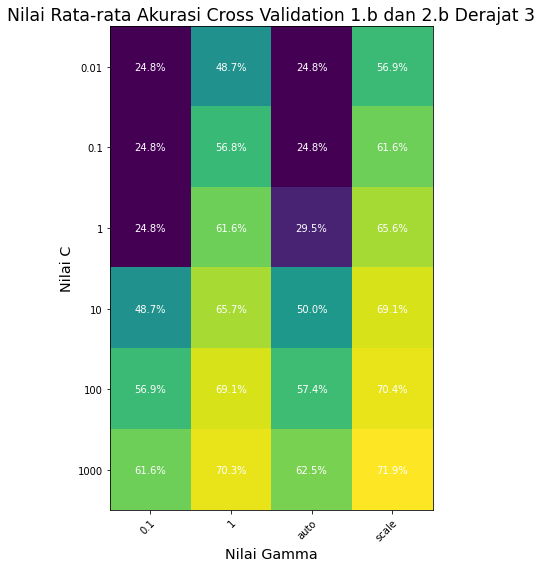

In [ ]:
# Visualisasi
C_range = [0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [0.1, 1, 'auto', 'scale']

scores = poly_ovo_3_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
im = ax.imshow(scores, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(gamma_range)))
ax.set_xticklabels(gamma_range)
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})

ax.set_yticks(np.arange(len(C_range)))
ax.set_yticklabels(C_range)
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        text = ax.text(j, i, '{}%'.format(round(scores[i, j]*100,1)),
                       ha="center", va="center", color="w")

ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.b Derajat 3", fontdict={'fontsize':'xx-large'})

fig.tight_layout()
plt.show()

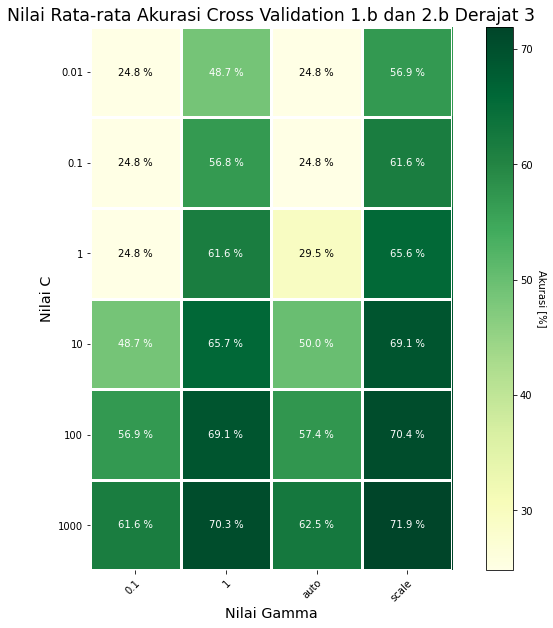

In [ ]:
C_range = [0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [0.1, 1, 'auto', 'scale']
scores = poly_ovo_3_gs["mean_test_score"].values.reshape(len(C_range), len(gamma_range))
scores = np.array(scores)*100

fig, ax = plt.subplots()
ax.set_title("Nilai Rata-rata Akurasi Cross Validation 1.b dan 2.b Derajat 3", fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Nilai Gamma', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Nilai C', fontdict={'fontsize':'x-large'})
im, cbar = heatmap(scores, C_range, gamma_range, ax=ax,
                   cmap="YlGn", cbarlabel="Akurasi [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.set_figwidth(12)
fig.set_figheight(10)
# fig.tight_layout()
plt.show()

{'C': 100, 'degree': 2, 'kernel': 'poly'}

In [ ]:
c_param = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
g_params = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 'scale', 'auto']
i = 4 # C = 1

c1 = []
for g_param in g_params:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    svm=SVM(C=c_param[i], decision_function_shape='ovr', gamma=g_param, kernel='poly')
    scores = cross_val_score(svm, X_train, y_train, cv=kfold)
    hasil = [c_param[i], g_param, scores[0], scores[1], scores[2], scores[3], scores[4], scores.mean()]
    c1.append(hasil)
c1

[[1,
  0.0001,
  0.25061425061425063,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.2491376284479733],
 [1,
  0.001,
  0.25061425061425063,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.2491376284479733],
 [1,
  0.01,
  0.25307125307125306,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.24962902893937375],
 [1,
  0.1,
  0.5307125307125307,
  0.5665024630541872,
  0.5344827586206896,
  0.5295566502463054,
  0.5467980295566502,
  0.5416104864380726],
 [1,
  1,
  0.20393120393120392,
  0.21921182266009853,
  0.23399014778325122,
  0.22660098522167488,
  0.2413793103448276,
  0.22502269398821123],
 [1,
  10,
  0.25061425061425063,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.24876847290640394,
  0.2491376284479733],
 [1,
  100,
  0.25061425061425063,
  0.24876847290640394,
  0.24876847290640394,
  0.2487684729064039

In [ ]:
clf = SVM(kernel='poly', gamma='scale', decision_function_shape='ovo')
clf.fit(X_train, y_train)

In [ ]:
n_features = X_train.shape[1]
gamma = 1 / (n_features * X.var())

clf._gamma

0.8840166067586764

In [ ]:
prediksi = clf.predict(X_test)
print(f"Hasil Prediksi : {prediksi}")

akurasi = clf.score(X_test, y_test)
print(f"Akurasi yang dicapai : {akurasi}")

Hasil Prediksi : [4 2 2 2 1 2 1 1 4 4 4 2 2 2 3 1 3 5 2 4 1 3 2 4 2 2 1 3 3 3 4 1 3 2 2 1 2
 5 4 2 3 4 1 5 3 1 3 5 2 4 5 5 4 4 4 4 4 4 2 4 3 1 3 1 4 1 3 1 2 4 4 3 2 1
 2 3 2 1 1 5 3 1 2 4 4 3 1 2 4 5 5 4 4 2 3 4 1 1 2 5 4 2 3 2 2 4 2 4 4 4 3
 2 1 2 2 2 2 2 2 2 3 5 1 2 2 5 2 5 5 1 2 1 1 4 1 4 4 2 3 3 2 1 1 3 3 4 4 2
 2 3 4 5 2 3 4 2 3 5 1 2 1 1 1 4 4 4 3 2 1 2 5 4 1 2 3 2 5 4 2 4 2 1 1 4 3
 1 5 4 4 2 5 2 5 3 4 3 3 2 3 1 1 2 4 2 2 1 1 4 5 3 4 4 2 5 2 3 1 2 3 3 4 5
 4 3 5 1 2 4 1 4 4 1 1 3 3 1 2 2 4 1 1 4 2 5 4 3 2 2 3 3 1 4 3 2 3 3 1 1 2
 1 2 4 5 5 1 2 3 4 4 3 4 2 1 3 5 4 3 1 2 1 2 5 2 1 2 3 3 5 1 2 2 1 4 5 5 1
 3 3 5 4 2 3 3 2 5 5 4 4 1 3 5 4 4 3 5 5 4 5 2 1 5 5 4 4 4 3 1 2 4 3 3 1 3
 4 3 1 3 2 1 4 5 4 5 4 4 2 2 5 1 3 2 4 2 5 4 2 1 1 3]
Akurasi yang dicapai : 0.6545961002785515


In [ ]:
def classification(data_file, rounds=100, remove_disperse=[]):
    df = pd.read_csv(data_file)
    df = df.drop(["Nama File"], axis=1)

    if remove_disperse:
        df = df.drop(remove_disperse, axis=1)

    X = df.drop(["Kelas"], axis=1)
    y = df["Kelas"]

    ans = {key: {"score": [], "sens": [], "spec": []}
           for key, value in classifiers.items()}

    print("Classifying...")

    for i in range(rounds):
        X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.3)

        for name, classifier in classifiers.items():
            # scaler = StandardScaler()
            scaler = MinMaxScaler(feature_range = (0, 1))
            # scaler = MinMaxScaler(feature_range = (-1, 1))
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            classifier.fit(X_train, y_train)
            score = classifier.score(X_test, y_test)

            ans[name]["score"].append(score)

    print("Classification done!")

    return ans

In [ ]:
def sumary(ans, title="Summary"):
    size = 70
    separator = "-"

    print(separator*size)
    print("SUMARY: {}".format(title))
    print(separator*size)
    print("CLASSIF\t\tMEAN\tMEDIAN\tMINV\tMAXV\tSTD")
    print(separator*size)

    for n in ans:
        m = round(np.mean(ans[n]["score"])*100, 2)
        med = round(np.median(ans[n]["score"])*100, 2)
        minv = round(np.min(ans[n]["score"])*100, 2)
        maxv = round(np.max(ans[n]["score"])*100, 2)
        std = round(np.std(ans[n]["score"])*100, 2)

        print("{:<16}{}\t{}\t{}\t{}\t{}".format(n, m, med, minv, maxv, std))

    print(separator*size)
    print()

Hasil klasifikasi SVm dengan Otsu Thresholding
Scaller 0 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/after_augmentation_thresholding/OtsuThres_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  34.13	34.17	31.97	36.15	0.71
----------------------------------------------------------------------



Hasil Klasifikasi SVM dengan Otsu Thresholding
Scaller -1 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/after_augmentation_thresholding/OtsuThres_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  32.41	32.29	30.6	34.45	0.78
----------------------------------------------------------------------



Hasil Klasifikasi SVM dengan Color Moment
Scaller -1 sampai 1

In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Color Moment/ColorMoment_5Class.csv"

ans = classification(data_file)

Classifying...
Classification done!


In [ ]:
sumary(ans)

----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  59.2	59.14	55.79	62.62	1.54
----------------------------------------------------------------------



## Hasil Klasifikasi SVM
*   Fitur 1 : Hu Moment <- Citra Biner Adaptive Gaussian Thresholding
*   Fitur 2 : Color Moment <- Citra HSV
*   Scaller -1 sampai 1


In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/Hu&ColorMoment_5Class.csv"
ans = classification(data_file)
sumary(ans)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  62.86	62.76	58.16	67.09	1.46
----------------------------------------------------------------------



*   Fitur 1 : Hu Moment <- Citra Biner Adaptive Gaussian Thresholding
*   Fitur 2 : Color Moment <- Citra HSV
*   Scaller 0 sampai 1


In [ ]:
data_file = "/content/drive/MyDrive/Skripsi/Ekstraksi Fitur/Hu + Color Moment/Hu&ColorMoment_5Class.csv"
ans = classification(data_file)
sumary(ans)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial_OVO  60.52	60.39	55.93	64.71	1.73
----------------------------------------------------------------------



# Perhitungan Manual

## Normalisasi Fitur

In [ ]:
# Perlu konversi numpy array ke dataframe
print(len(X_train))
print(len(X_test))

2151
239


In [ ]:
dt_latih = pd.DataFrame(X_train)
dt_uji = pd.DataFrame(X_test)
print(dt_latih)
print(dt_uji)
with pd.ExcelWriter('normalisasi_ColorMoment.xlsx') as writer:
    dt_latih.to_excel(writer, sheet_name='dt_Latih_Color')
    dt_uji.to_excel(writer, sheet_name='dt_Uji_Color')

             0         1         2         3         4         5         6  \
0     0.039231  0.506514  0.702280  0.032482  0.137759  0.424630  0.102505   
1     0.049218  0.426633  0.619974  0.072434  0.140185  0.569827  0.121576   
2     0.077293  0.120224  0.784891  0.167906  0.072592  0.152916  0.323615   
3     0.041964  0.111083  0.619180  0.041441  0.035818  0.013901  0.080871   
4     0.037354  0.169476  0.443788  0.137696  0.117642  0.244992  0.295389   
...        ...       ...       ...       ...       ...       ...       ...   
2146  0.179339  0.106726  0.575115  0.379848  0.234971  0.458288  0.478085   
2147  0.079498  0.060610  0.752296  0.171416  0.067328  0.305160  0.299000   
2148  0.034773  0.242552  0.824959  0.026200  0.264756  0.250965  0.064290   
2149  0.879671  0.391029  0.688302  0.530923  0.789688  0.417095  0.660841   
2150  0.703777  0.158757  0.772277  0.381968  0.364356  0.384896  0.480971   

             7         8  
0     0.219940  0.490271  
1     0.1

In [ ]:
# Pra-Pemrosesan Data

# Menggunakan citra cardboard1.jpg yang diresize dari ukuran asli (512x384) ke ukuran 8x8
# proses resize bertujuan memudahkan penjelasan perhitungan manual
img = cv2.imread('/content/drive/MyDrive/Skripsi/dataset-resized/cardboard/cardboard1.jpg') # Reading Image

# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (8, 8)) #Rumus resize yang digunakan menggunakan interpolasi linear

print(f"Resized Dimensions : {resized.shape}")

Original Dimensions : (384, 512, 3)
Resized Dimensions : (8, 8, 3)


Save NumPy Arrays to CSV Files
https://crunchcrunchhuman.com/2021/12/25/numpy-save-csv-write/

CSV is a human-readable, tabular format. This means only 1D and 2D NumPy arrays can be written to CSV.

In [ ]:
# save 3D array to binary NPY format
np.save('cardboard1_resized.npy', resized)

In [ ]:
resized_BGR = np.load('/content/drive/MyDrive/cardboard1_resized.npy')
resized_RGB = cv2.cvtColor(resized_BGR, cv2.COLOR_BGR2RGB)

In [ ]:
print(f'rezized BGR : \n{resized_BGR}')
print(f'rezized RGB : \n{resized_RGB}')

rezized BGR : 
[[[172 202 244]
  [162 190 231]
  [166 194 230]
  [160 190 225]
  [164 197 231]
  [149 183 218]
  [145 173 212]
  [140 169 209]]

 [[163 192 236]
  [162 194 230]
  [164 194 229]
  [156 186 221]
  [156 187 222]
  [145 177 215]
  [138 167 204]
  [132 161 200]]

 [[166 198 234]
  [157 189 225]
  [156 188 223]
  [152 185 218]
  [144 177 210]
  [141 173 208]
  [129 160 195]
  [123 150 186]]

 [[149 181 217]
  [155 187 222]
  [153 185 219]
  [146 179 212]
  [143 175 207]
  [131 163 197]
  [123 153 188]
  [101 128 161]]

 [[ 71  95 120]
  [126 155 188]
  [144 174 205]
  [153 188 224]
  [137 172 202]
  [127 158 192]
  [124 153 188]
  [ 91 117 147]]

 [[116 145 181]
  [127 155 190]
  [120 148 181]
  [115 144 175]
  [107 136 167]
  [100 129 160]
  [ 98 126 158]
  [ 64  89 109]]

 [[121 149 184]
  [121 147 182]
  [113 139 173]
  [106 134 165]
  [102 130 160]
  [ 94 122 153]
  [ 96 122 154]
  [ 63  87 107]]

 [[119 146 177]
  [117 142 176]
  [113 138 170]
  [106 132 162]
  [ 99 125 

In [ ]:
print(f'rezized RGB[0] : \n{resized_RGB[0]}')
print(f'rezized RGB[1] : \n{resized_RGB[1]}')
print(f'rezized RGB[7] : \n{resized_RGB[7]}')

rezized RGB[0] : 
[[244 202 172]
 [231 190 162]
 [230 194 166]
 [225 190 160]
 [231 197 164]
 [218 183 149]
 [212 173 145]
 [209 169 140]]
rezized RGB[1] : 
[[236 192 163]
 [230 194 162]
 [229 194 164]
 [221 186 156]
 [222 187 156]
 [215 177 145]
 [204 167 138]
 [200 161 132]]
rezized RGB[7] : 
[[177 146 119]
 [176 142 117]
 [170 138 113]
 [162 132 106]
 [155 125  99]
 [152 120  95]
 [148 117  91]
 [116  91  67]]


In [ ]:
# extract red channel
# menggunakan indeks 2 karena ketika citra dibaca oleh opencv berubah urutan channel warnanya
# dari RGB -> BGR
# sehingga untuk mendapatkan piksel per channel warna urutannya menjadi
# RGB -> BGR
# 012 -> 012
# Blue indeks ke 0
# Green indeks ke 1
# Red indeks ke 2

red_channel = resized_BGR[:,:,2]
print(f"Channel Red : \n{red_channel}")

green_channel = resized_BGR[:,:,1]
print(f"Channel Green : \n{green_channel}")

blue_channel = resized_BGR[:,:,0]
print(f"Channel Blue : \n{blue_channel}")

Channel Red : 
[[244 231 230 225 231 218 212 209]
 [236 230 229 221 222 215 204 200]
 [234 225 223 218 210 208 195 186]
 [217 222 219 212 207 197 188 161]
 [120 188 205 224 202 192 188 147]
 [181 190 181 175 167 160 158 109]
 [184 182 173 165 160 153 154 107]
 [177 176 170 162 155 152 148 116]]
Channel Green : 
[[202 190 194 190 197 183 173 169]
 [192 194 194 186 187 177 167 161]
 [198 189 188 185 177 173 160 150]
 [181 187 185 179 175 163 153 128]
 [ 95 155 174 188 172 158 153 117]
 [145 155 148 144 136 129 126  89]
 [149 147 139 134 130 122 122  87]
 [146 142 138 132 125 120 117  91]]
Channel Blue : 
[[172 162 166 160 164 149 145 140]
 [163 162 164 156 156 145 138 132]
 [166 157 156 152 144 141 129 123]
 [149 155 153 146 143 131 123 101]
 [ 71 126 144 153 137 127 124  91]
 [116 127 120 115 107 100  98  64]
 [121 121 113 106 102  94  96  63]
 [119 117 113 106  99  95  91  67]]


Konversi RGB ke *Grayscale*

In [ ]:
resized_gray = cv2.cvtColor(resized_BGR, cv2.COLOR_BGR2GRAY)
print(f'resized_gray :\n{resized_gray}')

resized_gray :
[[211 199 202 197 203 190 181 178]
 [202 201 201 193 194 185 175 169]
 [205 196 195 191 183 180 167 158]
 [188 194 192 185 181 170 160 135]
 [100 162 180 195 177 165 160 123]
 [152 162 155 150 142 135 132  92]
 [156 155 146 140 136 128 129  90]
 [152 149 145 138 131 127 123  96]]


In [ ]:
# save 3D array to binary NPY format
np.save('cardboard1_resized_gray.npy', resized_gray)

In [ ]:
resized_gray = np.load('/content/drive/MyDrive/cardboard1_resized_gray.npy')
print(f'resized_gray :\n{resized_gray}')

resized_gray :
[[211 199 202 197 203 190 181 178]
 [202 201 201 193 194 185 175 169]
 [205 196 195 191 183 180 167 158]
 [188 194 192 185 181 170 160 135]
 [100 162 180 195 177 165 160 123]
 [152 162 155 150 142 135 132  92]
 [156 155 146 140 136 128 129  90]
 [152 149 145 138 131 127 123  96]]


Gaussian Filter Citra

In [ ]:
# kernel 5x5 dengan nilai sigma 1
resized_gray_blur = cv.GaussianBlur(resized_gray,(5,5),1)
print(f'resized_gray_blur :\n{resized_gray_blur}')

resized_gray_blur :
[[202 201 199 196 193 186 179 176]
 [201 200 198 194 190 183 176 172]
 [195 195 194 190 185 177 168 163]
 [179 182 186 185 178 169 158 152]
 [160 166 173 174 167 158 146 139]
 [154 156 159 157 151 142 131 124]
 [153 153 149 144 139 131 122 115]
 [153 151 146 140 135 128 119 113]]


In [ ]:
# save 3D array to binary NPY format
np.save('/content/drive/MyDrive/resized_gray_blur.npy', resized_gray_blur)

In [ ]:
# import pandas as pd
import pandas as pd

df = pd.DataFrame(resized_gray_blur, columns =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype = int)
print(df)
# df.to_csv('/content/drive/MyDrive/resized_gray_blur.csv')

    x1   x2   x3   x4   x5   x6   x7   x8
0  202  201  199  196  192  186  179  176
1  201  200  197  194  190  183  176  172
2  194  194  193  190  185  177  168  164
3  179  182  185  184  178  169  158  153
4  162  166  173  173  167  157  146  140
5  154  156  159  157  151  142  132  126
6  153  152  150  145  139  132  122  117
7  153  151  147  141  135  128  119  114


In [ ]:
resized_gray_blur = np.load('/content/drive/MyDrive/resized_gray_blur.npy')
print(f'resized_gray_blur :\n{resized_gray_blur}')

resized_gray_blur :
[[202 201 199 196 192 186 179 176]
 [201 200 197 194 190 183 176 172]
 [194 194 193 190 185 177 168 164]
 [179 182 185 184 178 169 158 153]
 [162 166 173 173 167 157 146 140]
 [154 156 159 157 151 142 132 126]
 [153 152 150 145 139 132 122 117]
 [153 151 147 141 135 128 119 114]]


In [ ]:
# Objek berwarna putih (piksel 255 atau 1)
# Adaptive Mean Thresholding
adaptive_mean_img = cv.adaptiveThreshold(resized_gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C, \
                                          cv.THRESH_BINARY_INV,21,2)
# Adaptive Gaussian Thresholding
adaptive_gaussian_img = cv.adaptiveThreshold(resized_gray_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                            cv.THRESH_BINARY_INV,21,2)
# Otsu Binarization
ret1,otsu_img = cv.threshold(resized_gray_blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
print(f'adaptive_mean_img :\n{adaptive_mean_img}')
print(f'adaptive_gaussian_img :\n{adaptive_gaussian_img}')
print(f'otsu_img :\n{otsu_img}')
print(f'ret1 :\n{ret1}')

adaptive_mean_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0 255 255]
 [255 255   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
adaptive_gaussian_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [255 255   0   0   0   0 255 255]
 [255 255   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
otsu_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [  0   0   0   0   0   0 255 255]
 [255   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
ret1 :
163.0


In [ ]:
# save 3D array to binary NPY format
np.save('/content/drive/MyDrive/adaptive_mean_img.npy', adaptive_mean_img)
np.save('/content/drive/MyDrive/adaptive_gaussian_img.npy', adaptive_gaussian_img)
np.save('/content/drive/MyDrive/otsu_img.npy', otsu_img)

adaptive_mean_img = np.load('/content/drive/MyDrive/adaptive_mean_img.npy')
print(f'adaptive_mean_img :\n{adaptive_mean_img}')
adaptive_gaussian_img = np.load('/content/drive/MyDrive/adaptive_gaussian_img.npy')
print(f'adaptive_gaussian_img :\n{adaptive_gaussian_img}')
otsu_img = np.load('/content/drive/MyDrive/otsu_img.npy')
print(f'otsu_img :\n{otsu_img}')

adaptive_mean_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [255   0   0   0   0   0 255 255]
 [255 255   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
adaptive_gaussian_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [255 255   0   0   0   0 255 255]
 [255 255   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
otsu_img :
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255]
 [  0   0   0   0   0   0 255 255]
 [255   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


In [ ]:
# image = adaptive_mean_img
# image = adaptive_gaussian_img
image = otsu_img
df = pd.DataFrame(image, columns =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype = int)
path = "/content/drive/MyDrive/"
# data_file = "adaptive_mean_img.csv"
# data_file = "adaptive_gaussian_img.csv"
data_file = "otsu_img.csv"

path = os.path.join(path, data_file)
df.to_csv(path, index=None)

Ekstraksi Fitur Hu Moment

1. Hu Moment

2. HSV Color Moment